# Classification Network

The goal here is to classify whether the error rate is "low" "medium" or "high".
If we can successfully do this, then look at whether we can get the sign right. Start off by using the squeezenet model.

### Todos:
- [x] Add dense layer
- [x] Abstract images file
- [x] Write a models file 
- [ ] high resolution flow
- [ ] try adding flow and raw images


In [49]:
## Setup
from __future__ import print_function
import time, os, json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import csv

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

def get_session():
    """Create a session that dynamically allocates memory."""
    # See: https://www.tensorflow.org/tutorials/using_gpu#allowing_gpu_memory_growth
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    session = tf.Session(config=config)
    return session

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Loading vector data
Loading image data
Preprocessing data
Input shape:  (9400, 48, 64, 2)


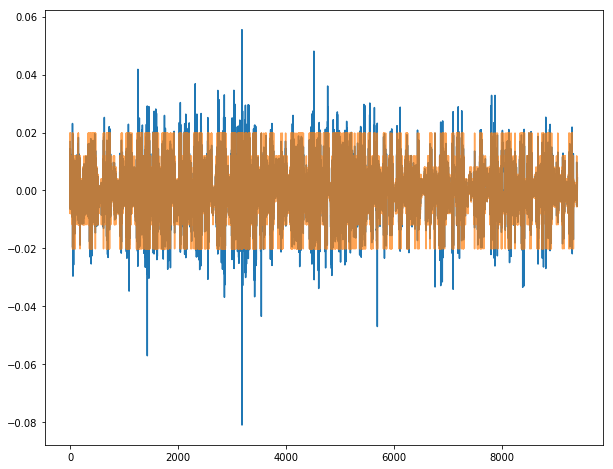

In [51]:
BATCH_SIZE = 1024
NUM_CLASSES = 16
TRAIN_RATIO = 0.6

import utilities
# Datafile options:
imu_data,x_data,y_norm = utilities.load_data('/media/Big_Data/stefantj/flows_lowres_16k.npy')
#imu_data,flows_data,y_norm = utilities.load_data('../gbucket/center_cropped_300x300.npy')
#imu_data,x_data,y_norm = utilities.load_data('../gbucket/center_cropped_192x192.npy')

# Split into training/val data:
N_training = int(TRAIN_RATIO*x_data.shape[0])
N_validation = x_data.shape[0]- N_training

y_data, mean_vals = utilities.discretize_outputs(y_norm[0:N_training], NUM_CLASSES)
y_data, tmp = utilities.discretize_outputs(y_norm, NUM_CLASSES)

x_train = x_data[0:N_training,...]
y_train = y_data[0:N_training]

x_val = x_data[N_training:,...]
y_val = y_data[N_training:]

print('Input shape: ', x_data.shape)

# Plot the discretization with perfect classification:
plt.plot(y_norm)
plt.plot(mean_vals[y_data.astype(np.int32)],alpha=0.7)



In [ ]:
from classifiers.squeezenet import SqueezeNet

with tf.device('/gpu:0'):
    tf.reset_default_graph() # remove all existing variables in the graph 
    sess = get_session() # start a new Session

    # Load the model:
    model = SqueezeNet(NUM_CLASSES, x_data.shape[3], x_data.shape[1])
    # If you want a pretrained model, pass save_path as an argument. 
    # Since pretrained weights didn't do well, let's skip them. 
    # SAVE_PATH = 'classifiers/squeezenet.ckpt'

    # Slow way to initialize variables that is robust to partially loaded models:
    uninitialized_vars = []
    for var in tf.global_variables():
        try:
            sess.run(var)
        except tf.errors.FailedPreconditionError:
            uninitialized_vars.append(var)

    init = tf.variables_initializer(uninitialized_vars)
    sess.run(init)

    saver = tf.train.Saver()
#    saver.restore(sess, './checkpoints/good_run') # Assumes N_classes = 128, batch_size = 64
    saver.restore(sess, tf.train.latest_checkpoint('.'))

(9400, 48, 64, 2)
Step:  0  Train Acc:  0.0555556  Val Acc:  0.0 loss 2.75554 LR:  0.000784


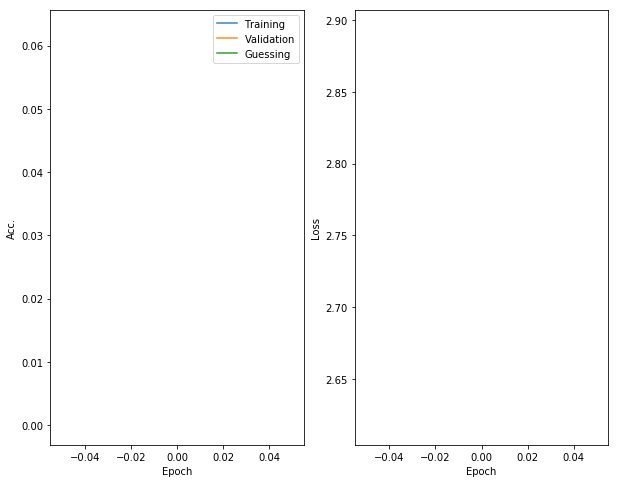

RMSE:  0.00921259583243
Ratio to zero-prediction:  1.10394550064
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.0064162035528280096)


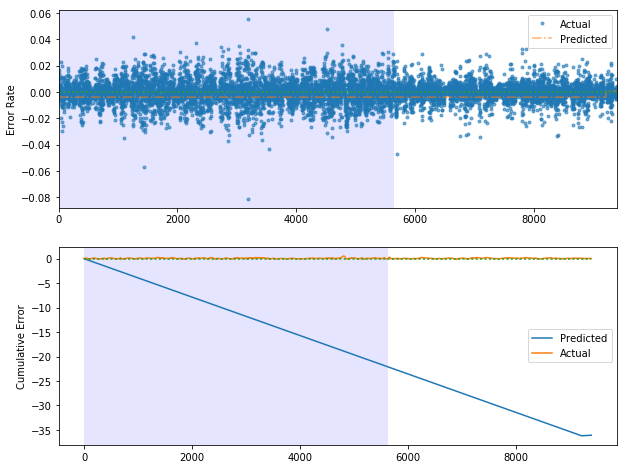

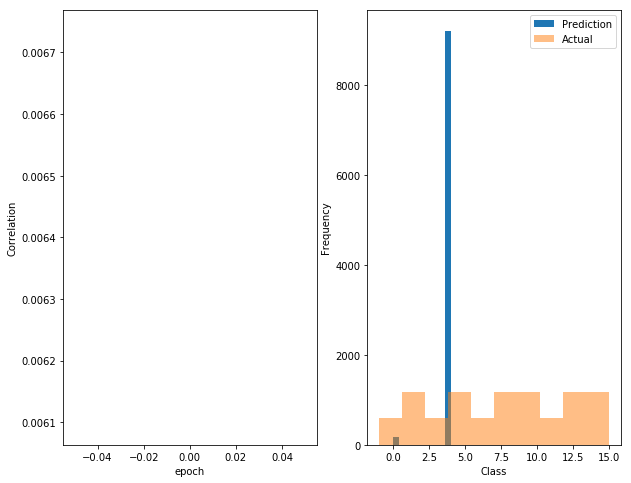

Step:  1000  Train Acc:  0.074028426394  Val Acc:  0.0307692 loss 2.75735046988 LR:  0.000737894528


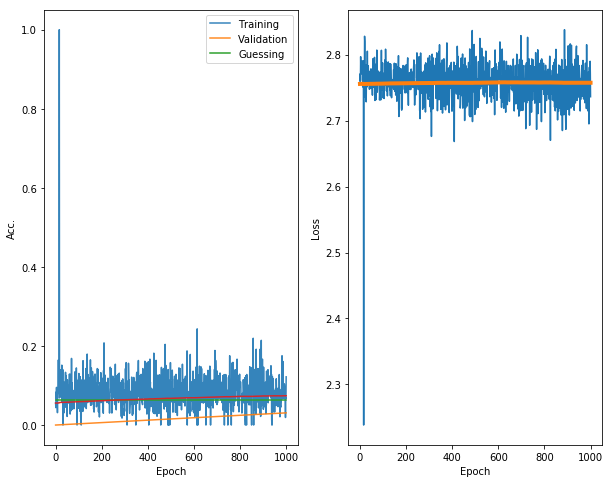

RMSE:  0.0180093258172
Ratio to zero-prediction:  2.15805779033
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.031692180831455224)


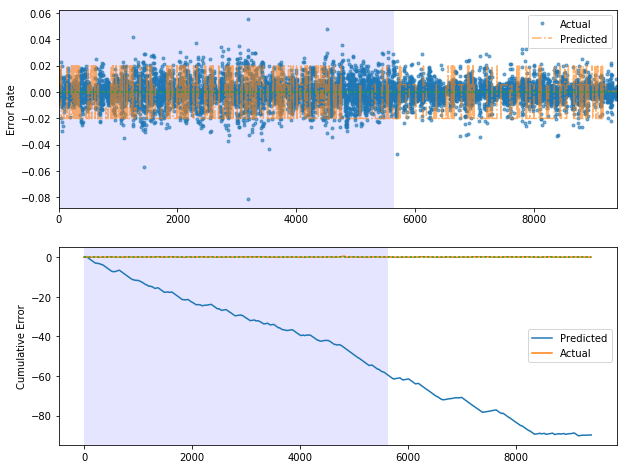

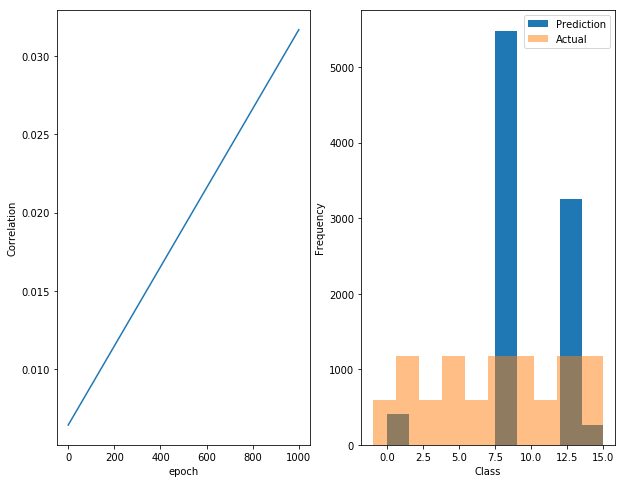

Step:  2000  Train Acc:  0.0838910311744  Val Acc:  0.0352941 loss 2.75467048128 LR:  0.000694500426597


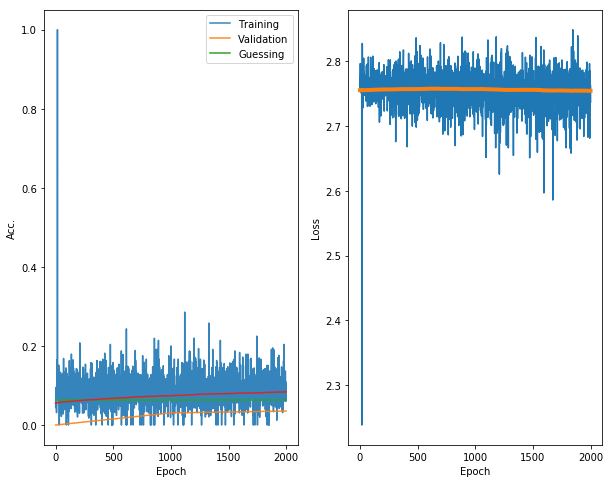

RMSE:  0.0197508569319
Ratio to zero-prediction:  2.36674549066
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.043831111616352454)


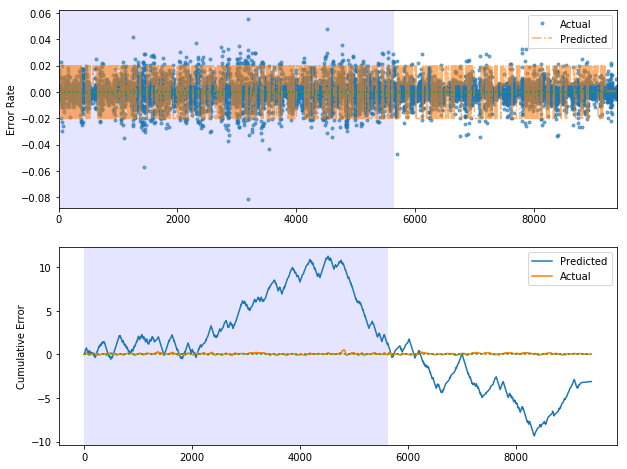

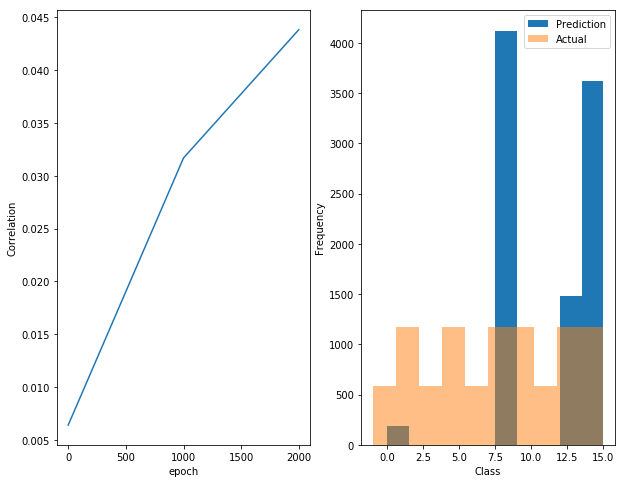

Step:  3000  Train Acc:  0.0919617961714  Val Acc:  0.0416667 loss 2.75090903418 LR:  0.0006405850806


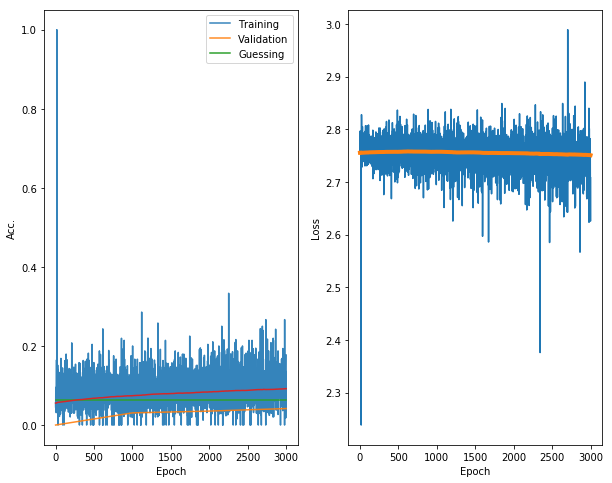

RMSE:  0.0193480012201
Ratio to zero-prediction:  2.31847128451
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.040079701069995949)


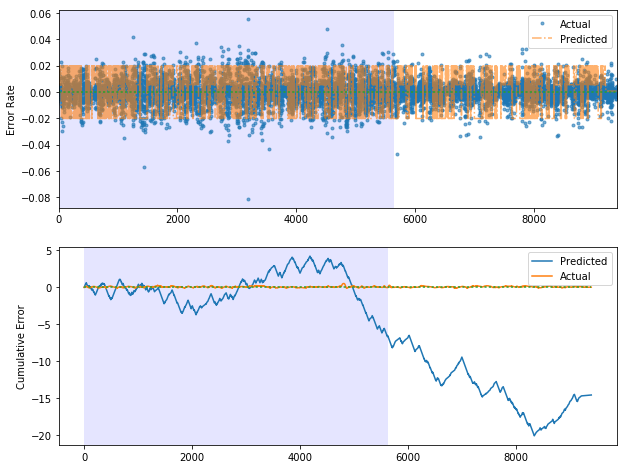

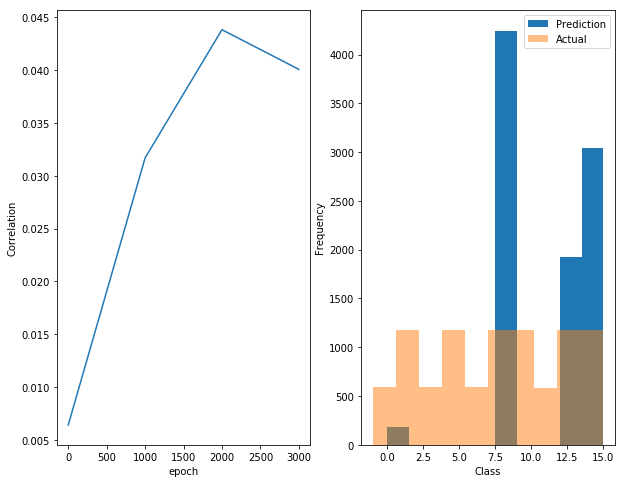

Step:  4000  Train Acc:  0.0954654564599  Val Acc:  0.03125 loss 2.74757029891 LR:  0.00060291355318


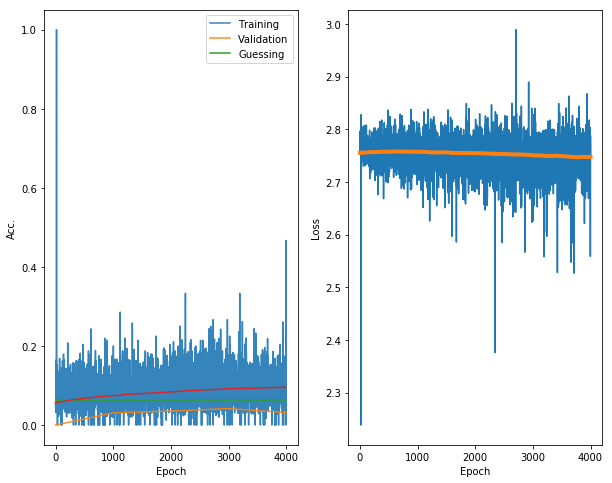

RMSE:  0.0173521820834
Ratio to zero-prediction:  2.07931224659
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.042973708042923914)


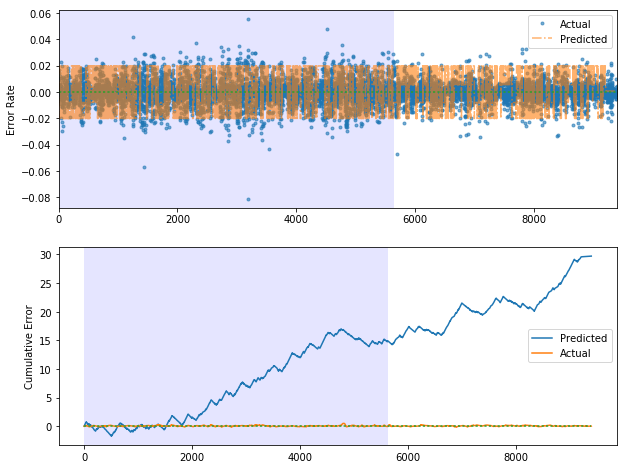

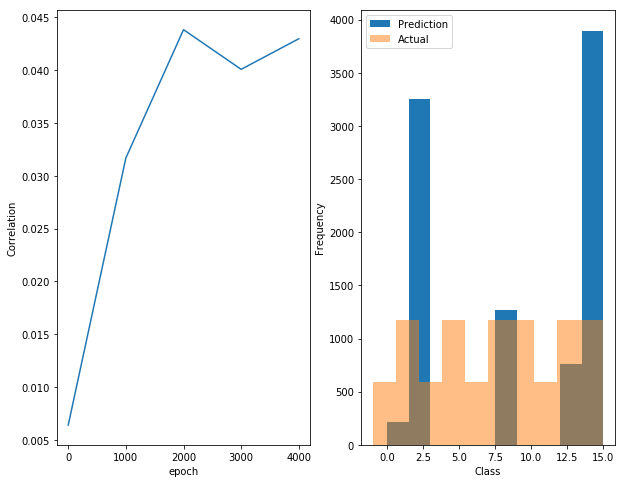

Step:  5000  Train Acc:  0.100135605621  Val Acc:  0.0714286 loss 2.74344332517 LR:  0.000567457412945


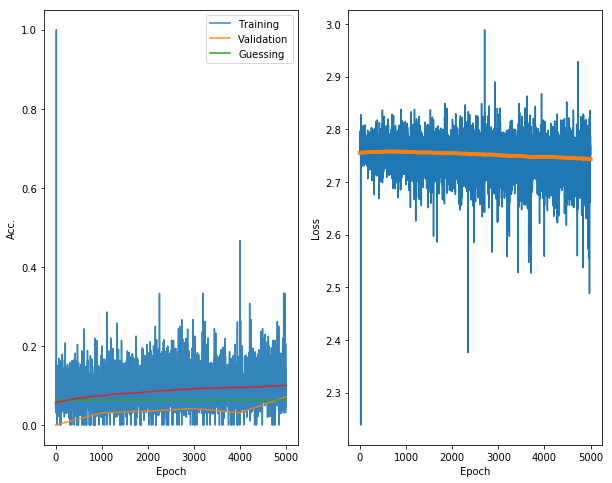

RMSE:  0.0138337920215
Ratio to zero-prediction:  1.65770351123
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.045255376352993149)


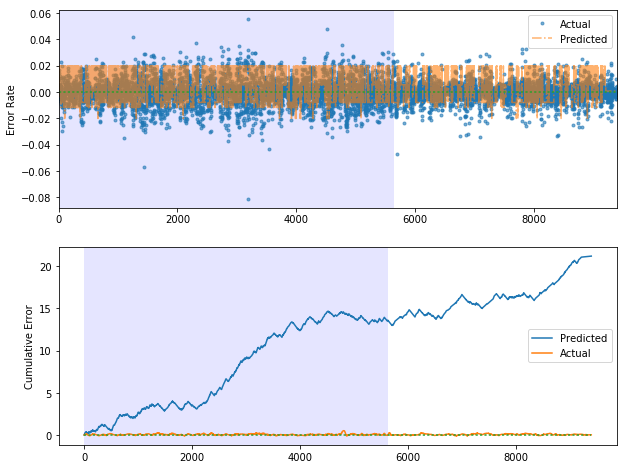

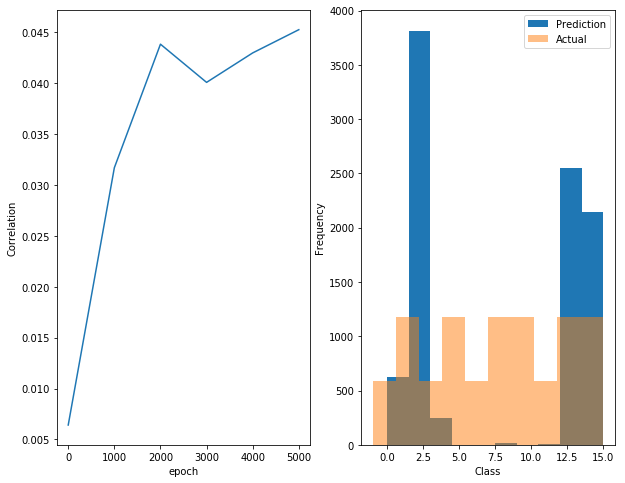

Step:  6000  Train Acc:  0.106905146391  Val Acc:  0.0416667 loss 2.7298509144 LR:  0.000523404649856


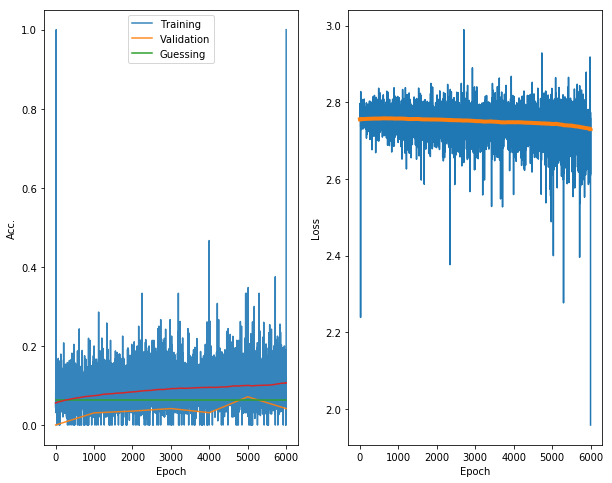

RMSE:  0.0175819269858
Ratio to zero-prediction:  2.10684258178
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.069554408287537117)


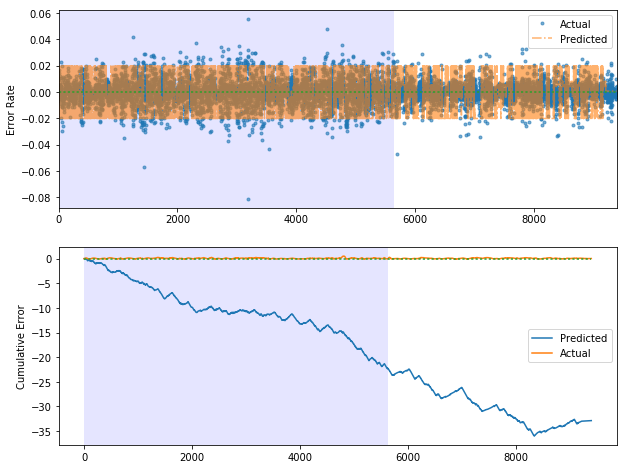

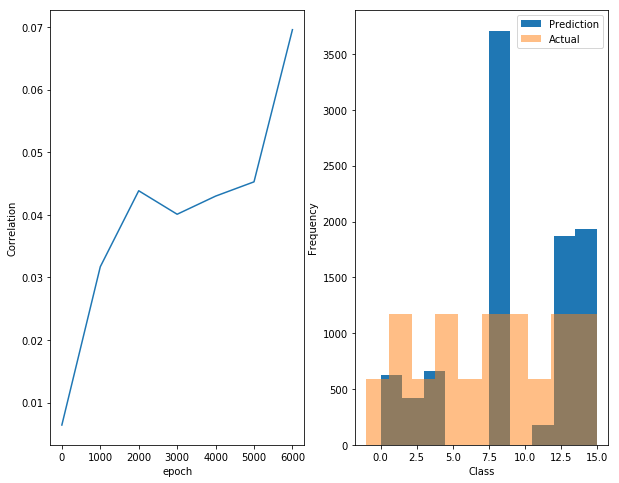

Step:  7000  Train Acc:  0.124366235355  Val Acc:  0.0454545 loss 2.69596482862 LR:  0.000492624269207


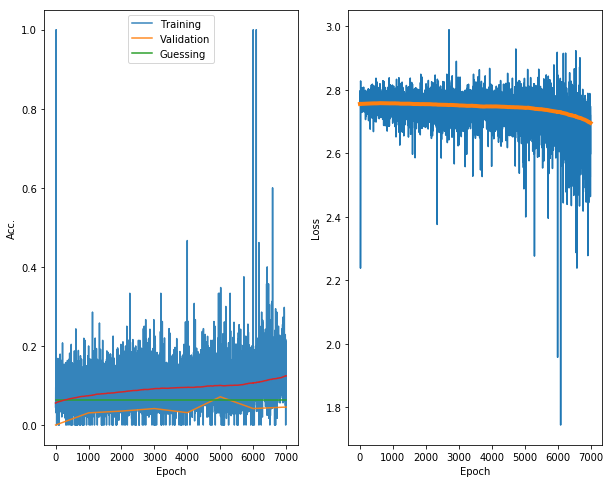

RMSE:  0.0162219040345
Ratio to zero-prediction:  1.94387101055
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.080380858584520501)


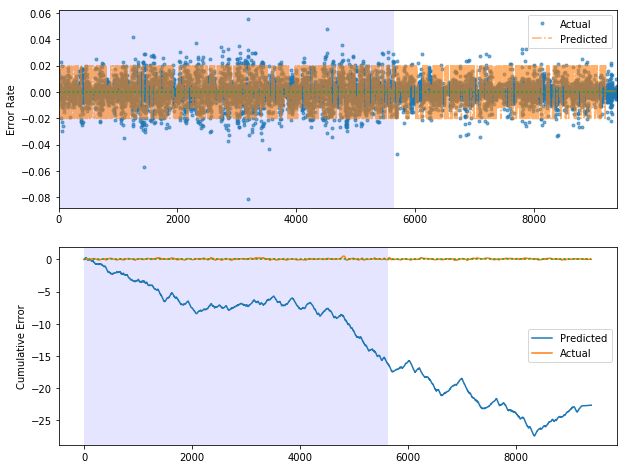

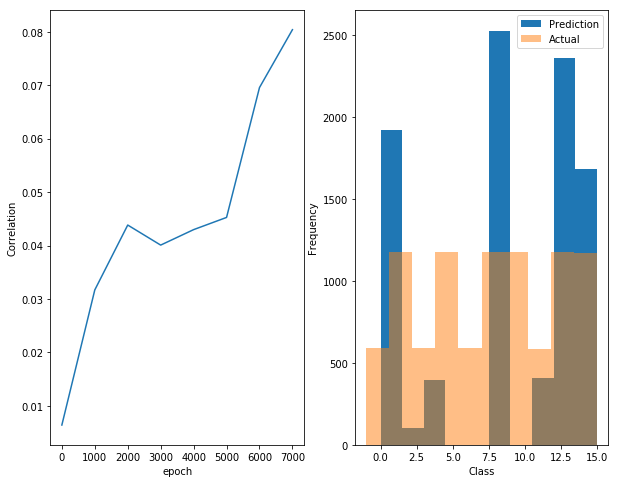

Step:  8000  Train Acc:  0.158487254417  Val Acc:  0.0153846 loss 2.61235935057 LR:  0.000463654021184


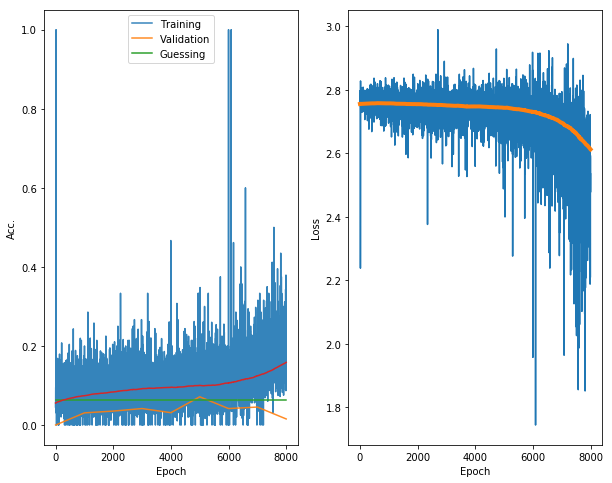

RMSE:  0.014027817192
Ratio to zero-prediction:  1.68095355039
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.11673723863704588)


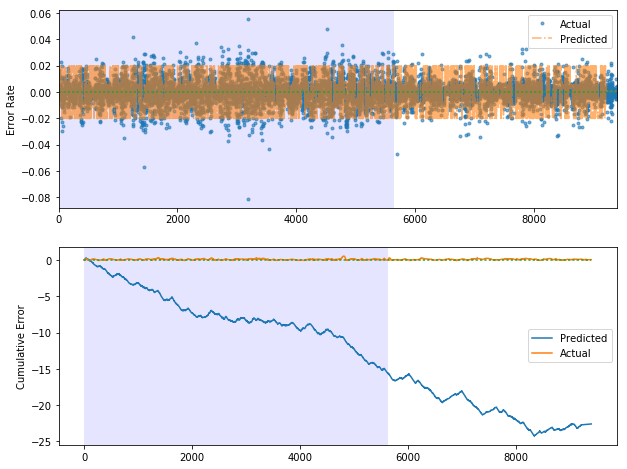

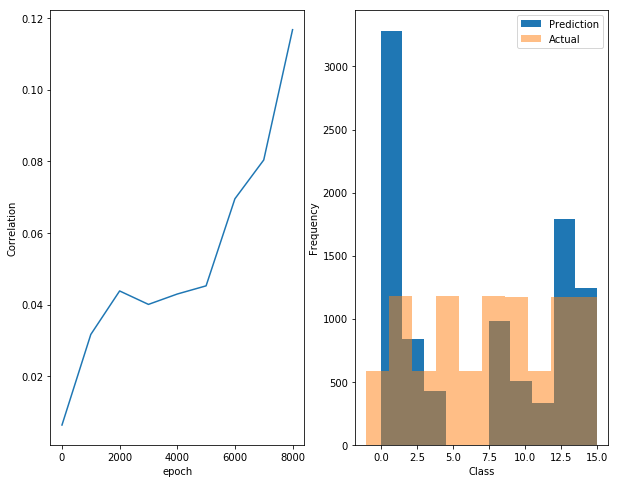

Step:  9000  Train Acc:  0.213594623331  Val Acc:  0.0945946 loss 2.45917745874 LR:  0.000427659706396


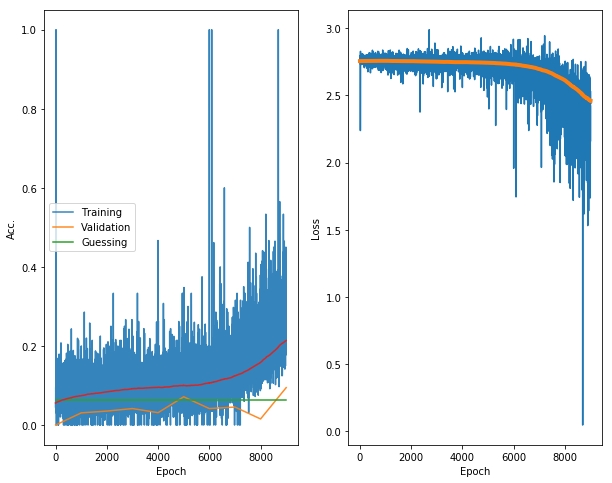

RMSE:  0.0139001481039
Ratio to zero-prediction:  1.66565496159
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.19533985404776338)


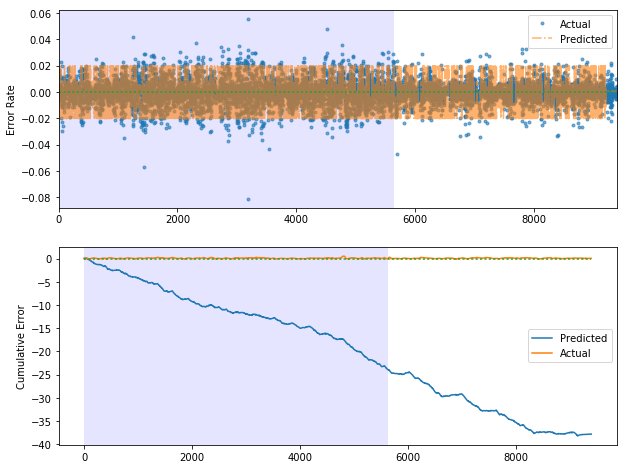

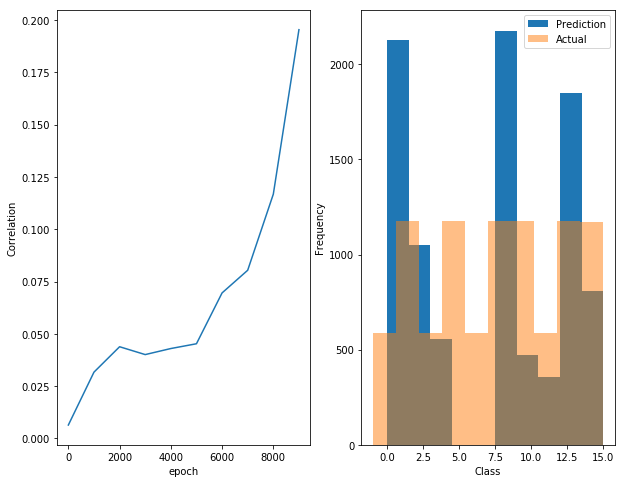

Step:  10000  Train Acc:  0.272639982889  Val Acc:  0.0338983 loss 2.28294660982 LR:  0.000402509894382


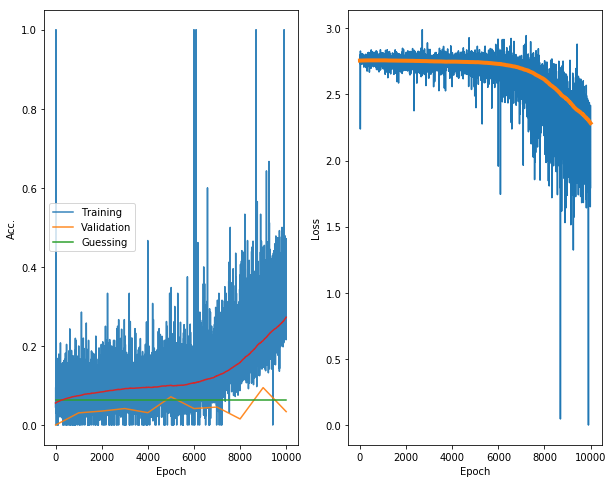

RMSE:  0.0116181107894
Ratio to zero-prediction:  1.39219839502
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.28211114391236902)


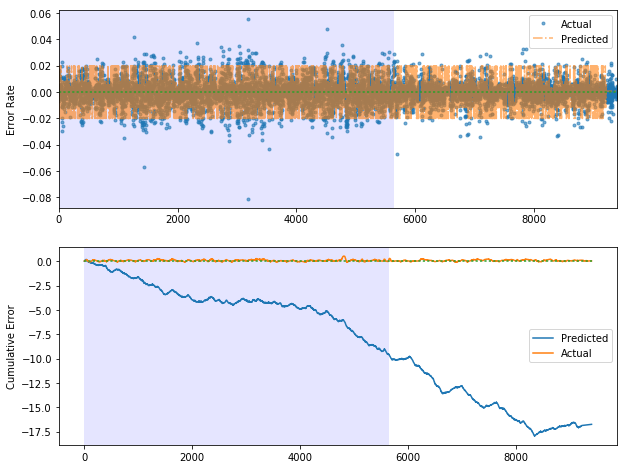

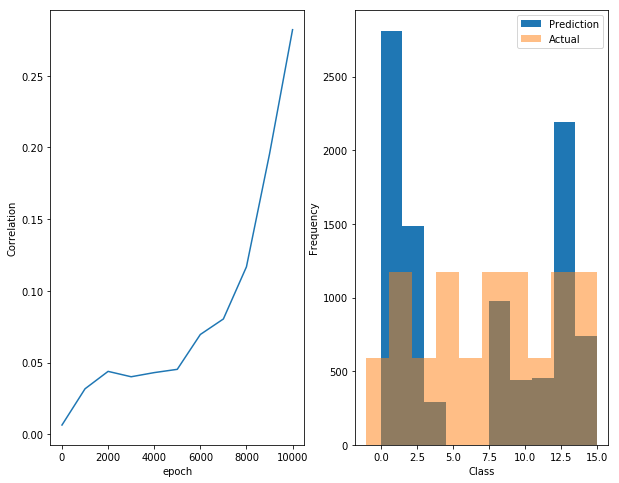

Step:  11000  Train Acc:  0.317291542052  Val Acc:  0.107143 loss 2.1471757707 LR:  0.000378839092513


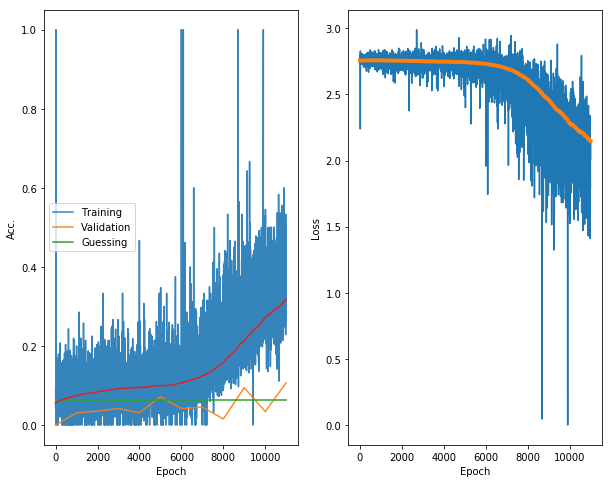

RMSE:  0.011259161045
Ratio to zero-prediction:  1.34918544161
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.3281036680286496)


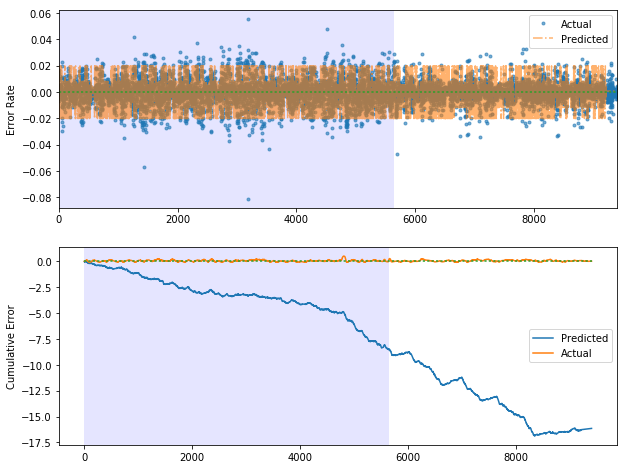

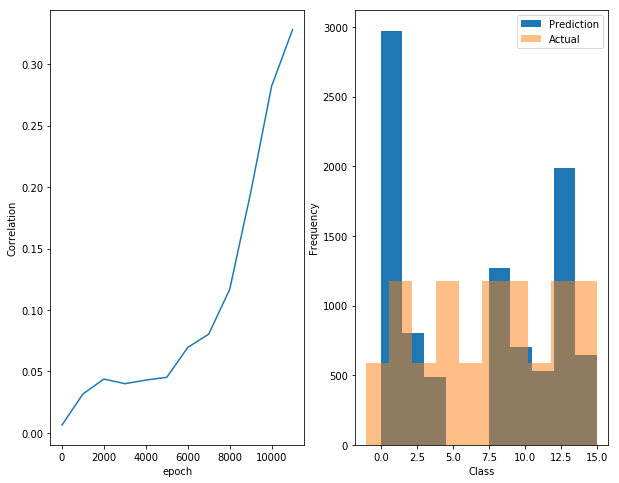

Step:  12000  Train Acc:  0.353608429769  Val Acc:  0.0769231 loss 2.04602202978 LR:  0.000349429116698


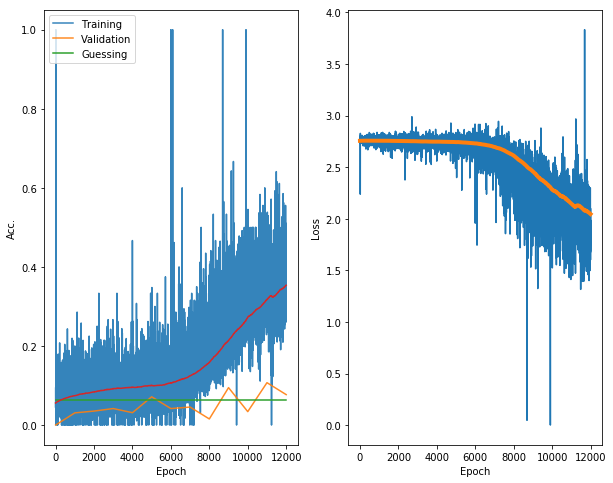

RMSE:  0.0100129628061
Ratio to zero-prediction:  1.19985348743
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.38092545994172256)


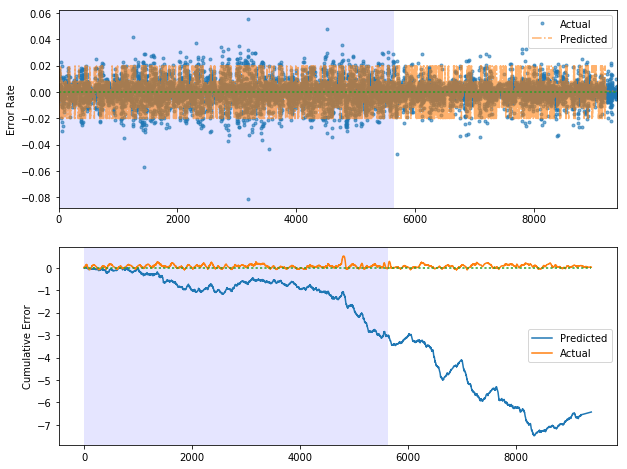

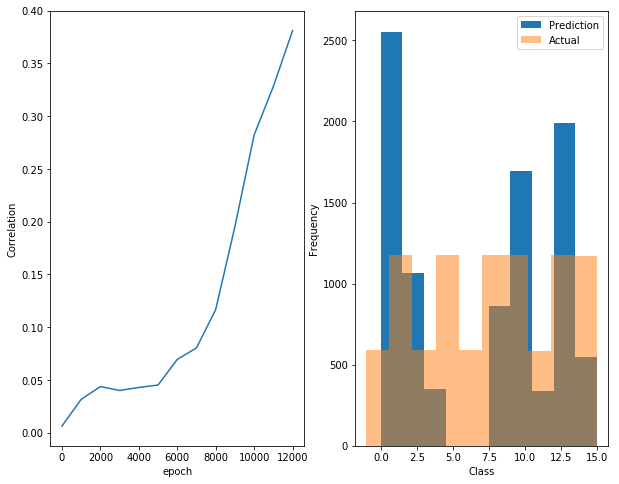

Step:  13000  Train Acc:  0.39004276532  Val Acc:  0.0681818 loss 1.93946705482 LR:  0.000328879889203


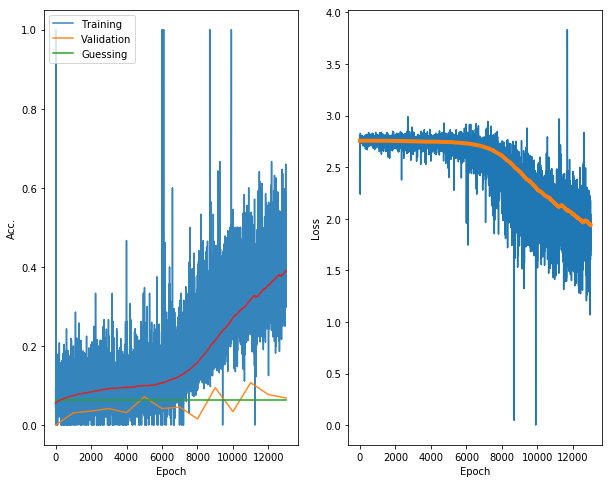

RMSE:  0.0101735170504
Ratio to zero-prediction:  1.21909270499
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.39271770698632308)


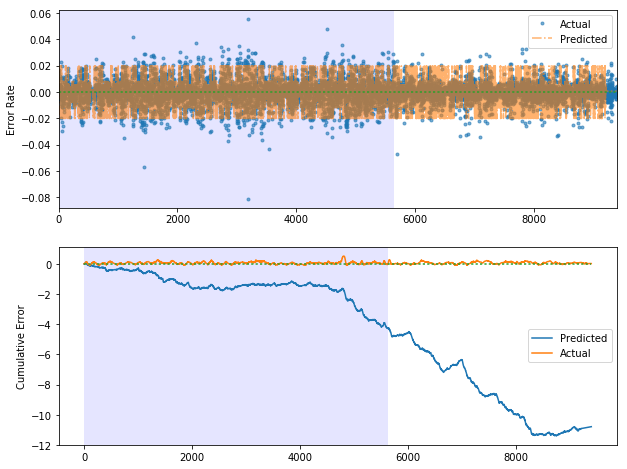

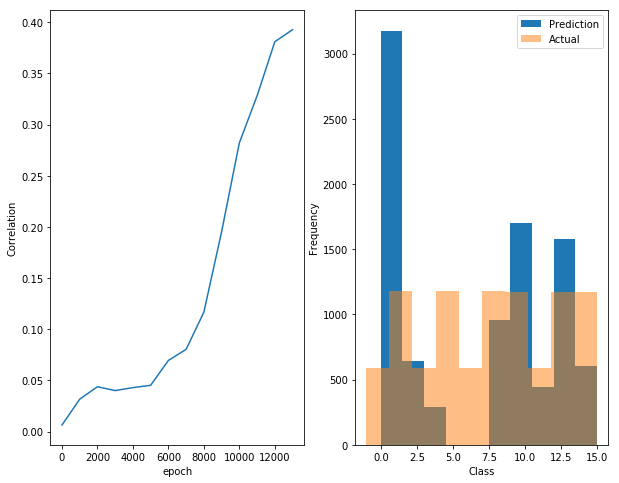

Step:  14000  Train Acc:  0.422709050547  Val Acc:  0.0229885 loss 1.83037955033 LR:  0.000309539120679


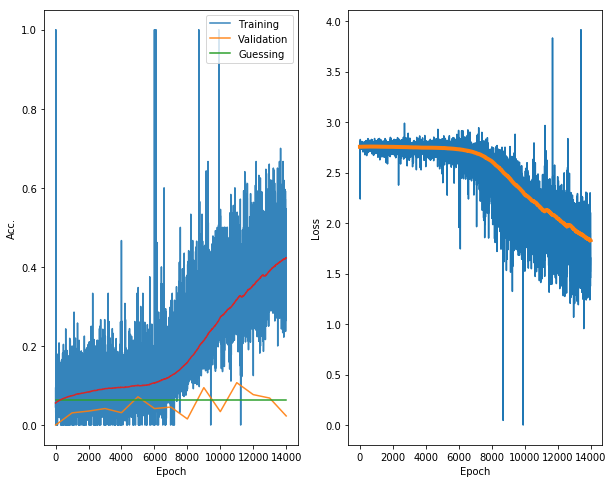

RMSE:  0.0101776546518
Ratio to zero-prediction:  1.21958851384
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.39062978465347642)


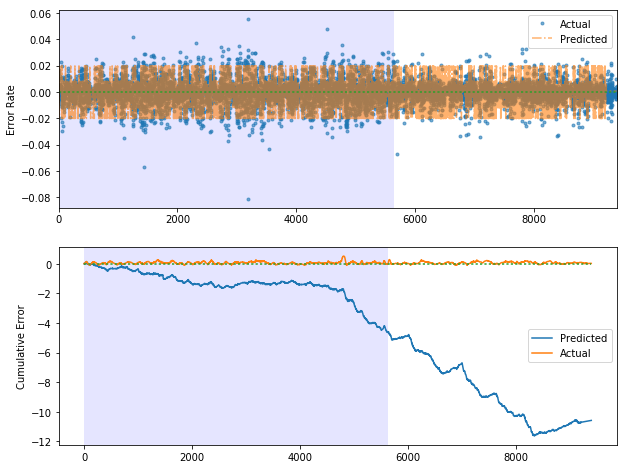

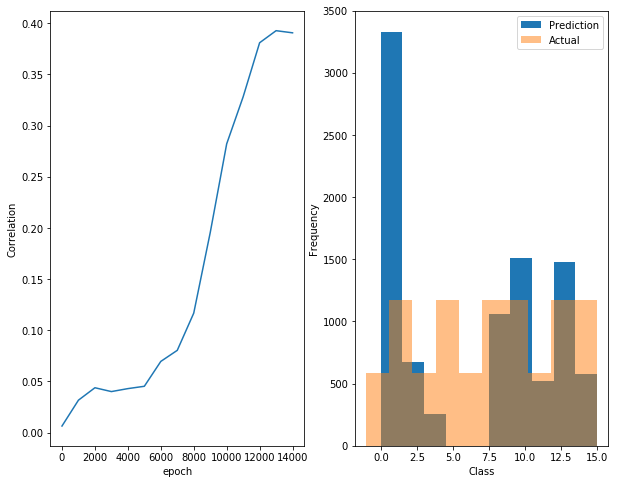

Step:  15000  Train Acc:  0.440790197562  Val Acc:  0.0277778 loss 1.76122158544 LR:  0.000285509029188


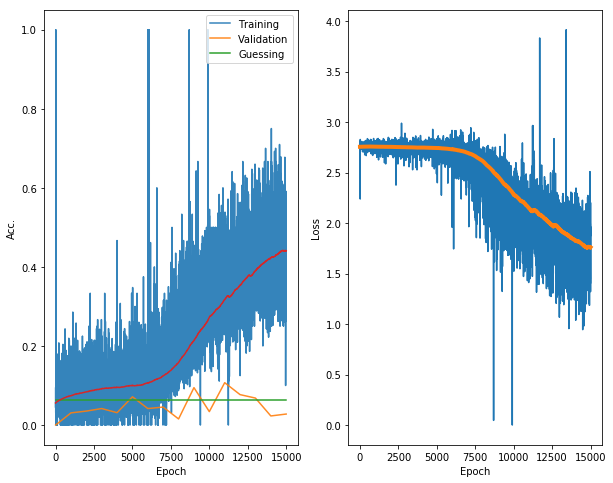

RMSE:  0.0097214401303
Ratio to zero-prediction:  1.16492032069
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.41430060254028517)


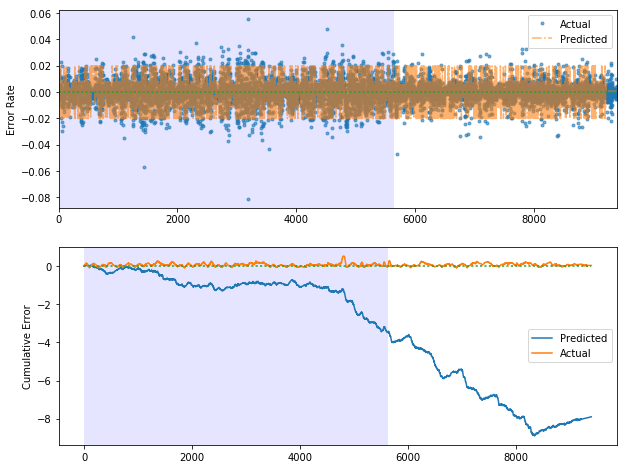

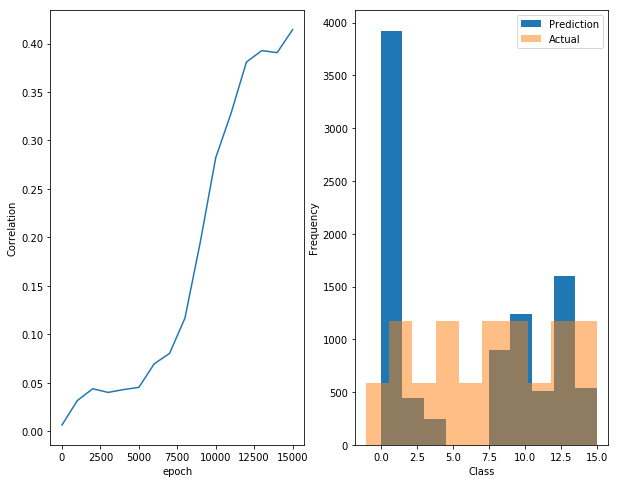

Step:  16000  Train Acc:  0.448307184657  Val Acc:  0.134615 loss 1.73701775469 LR:  0.0002687188142


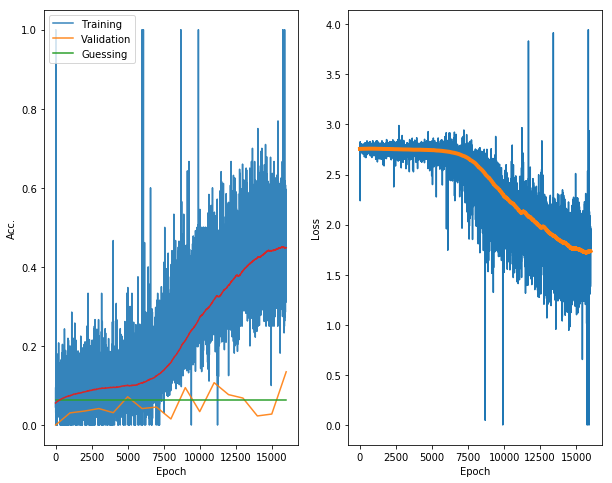

RMSE:  0.00974937484475
Ratio to zero-prediction:  1.16826773796
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.41875972352028007)


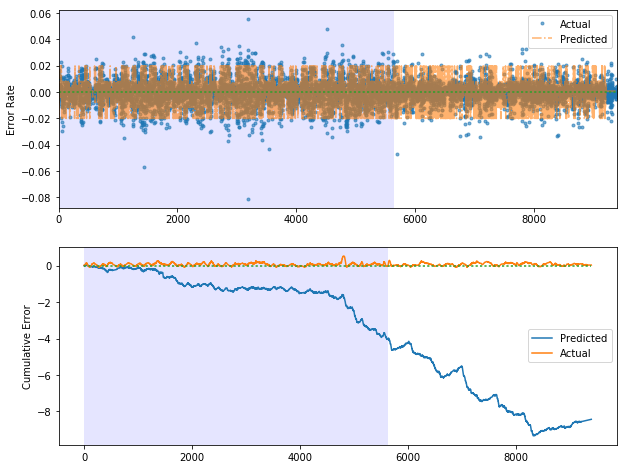

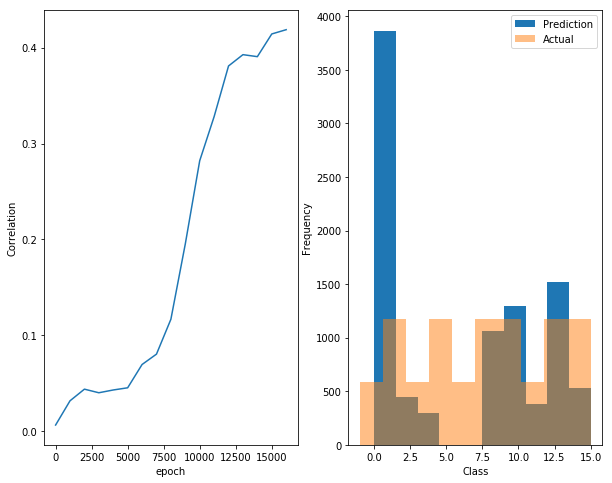

Step:  17000  Train Acc:  0.468021043259  Val Acc:  0.0188679 loss 1.65336972227 LR:  0.000252915998174


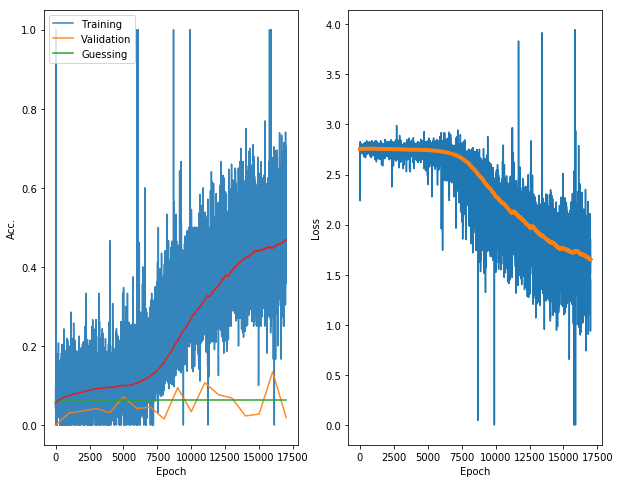

RMSE:  0.00944109995068
Ratio to zero-prediction:  1.13132715265
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.44073366227894983)


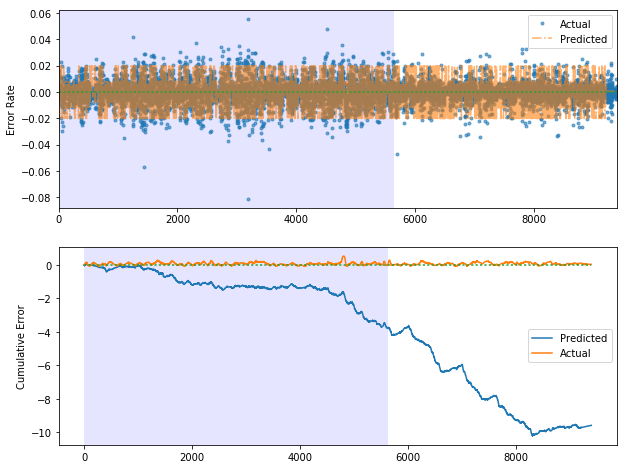

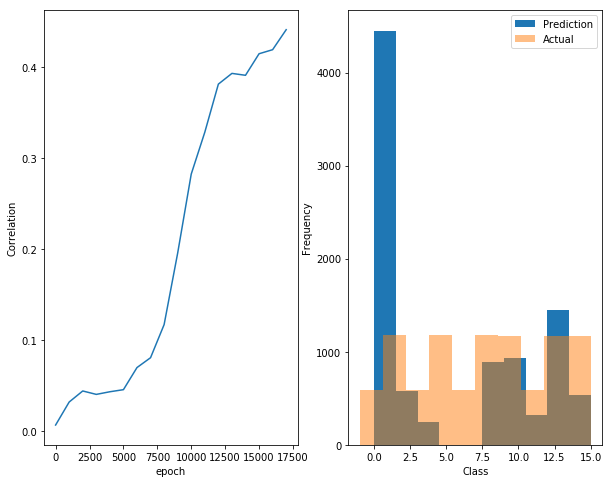

Step:  18000  Train Acc:  0.472459482535  Val Acc:  0.0519481 loss 1.64047335509 LR:  0.000233281663871


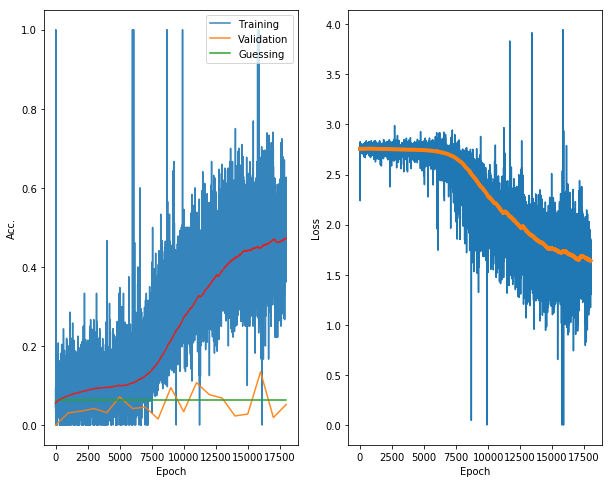

RMSE:  0.00955678052818
Ratio to zero-prediction:  1.14518915803
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.43572933460183677)


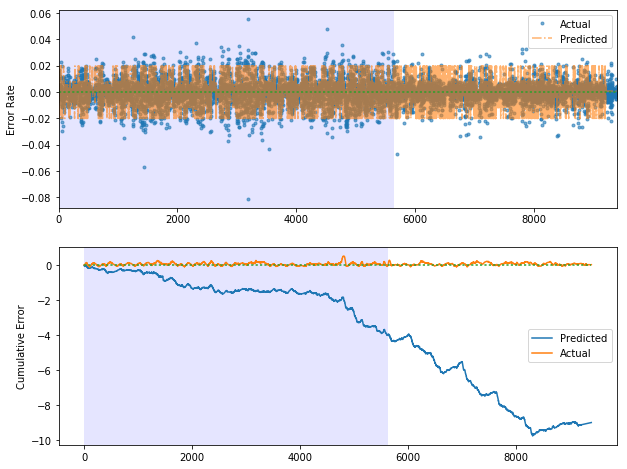

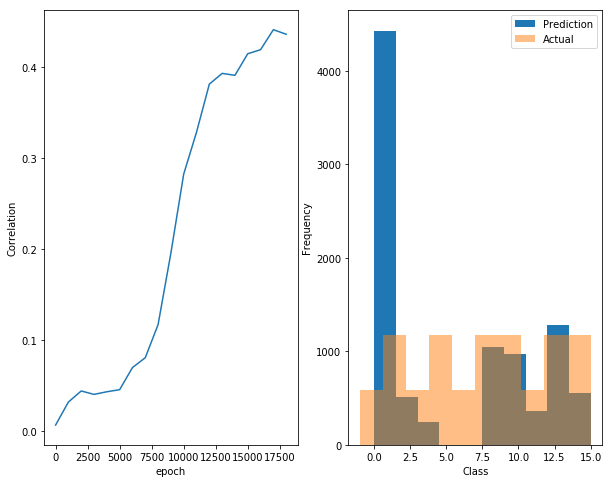

Step:  19000  Train Acc:  0.479261759266  Val Acc:  0.0 loss 1.61612858535 LR:  0.000219562835782


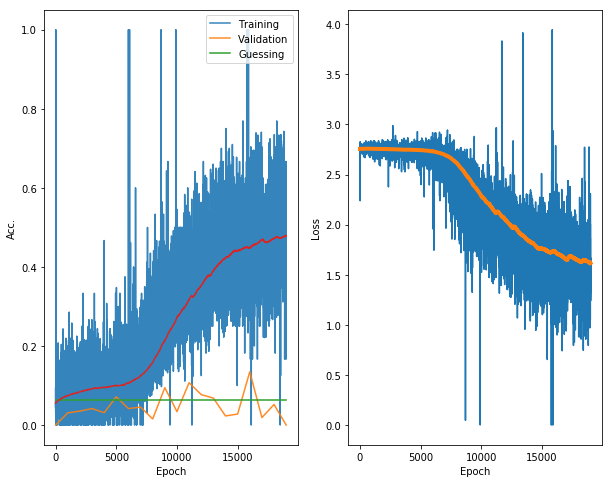

RMSE:  0.00893388387084
Ratio to zero-prediction:  1.07054744198
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.46420080940774483)


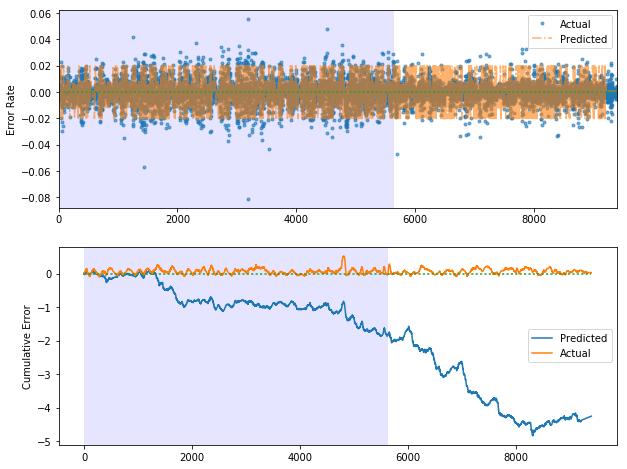

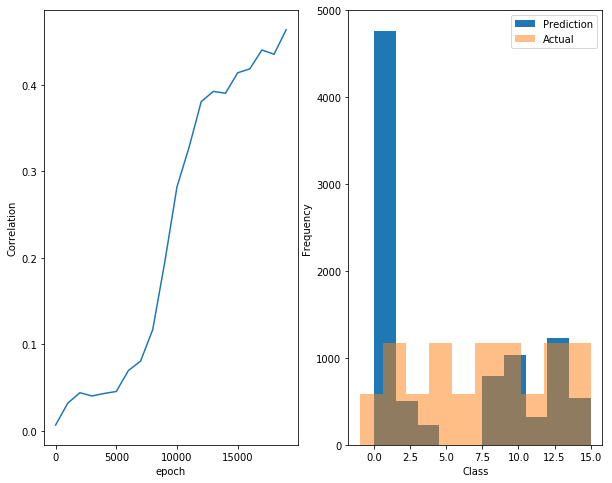

Step:  20000  Train Acc:  0.483391452392  Val Acc:  0.102041 loss 1.60580452177 LR:  0.000206650784535


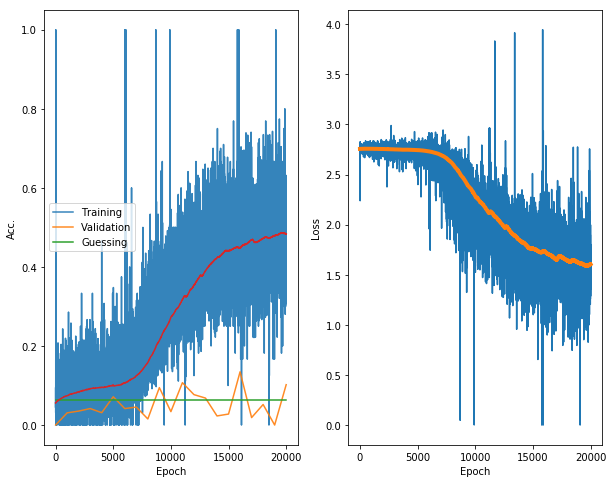

RMSE:  0.00910031046928
Ratio to zero-prediction:  1.09049034384
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.45730112464204831)


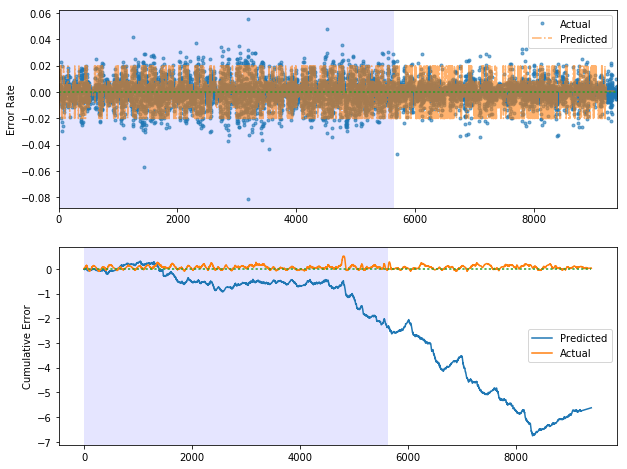

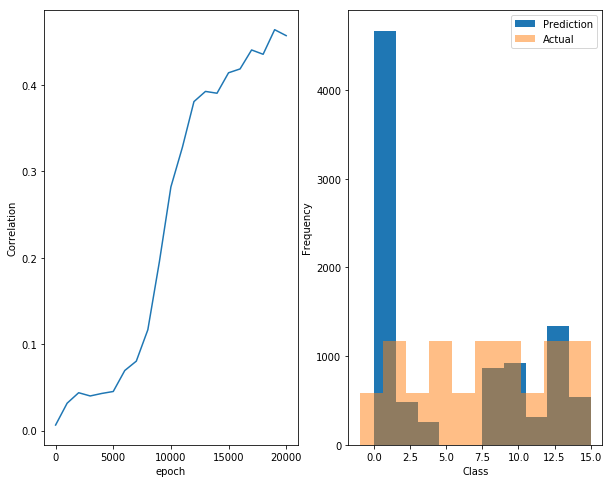

Step:  21000  Train Acc:  0.493054231791  Val Acc:  0.0 loss 1.56959725329 LR:  0.000190608103894


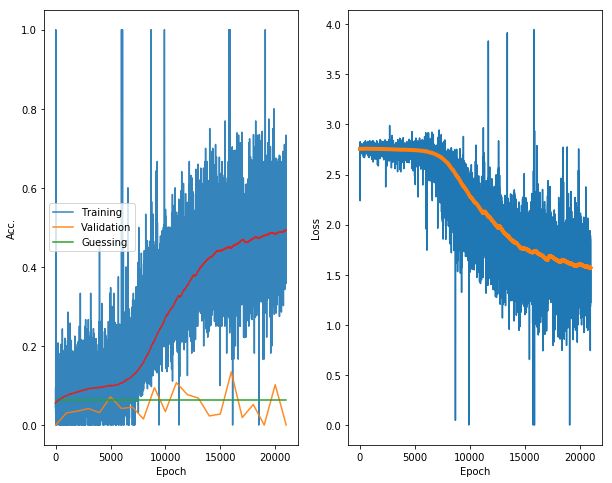

RMSE:  0.00898490491495
Ratio to zero-prediction:  1.07666129448
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.46383479603089184)


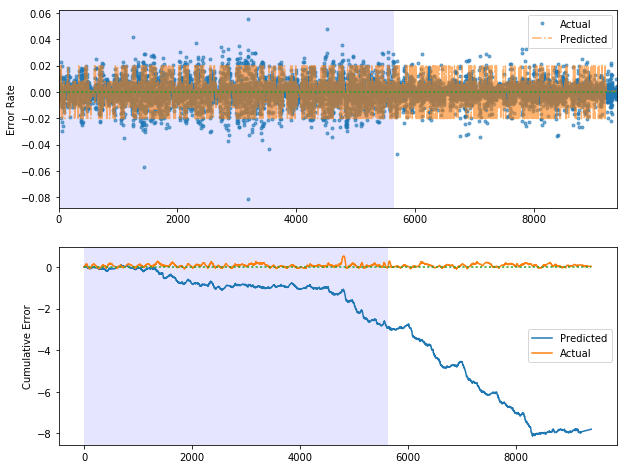

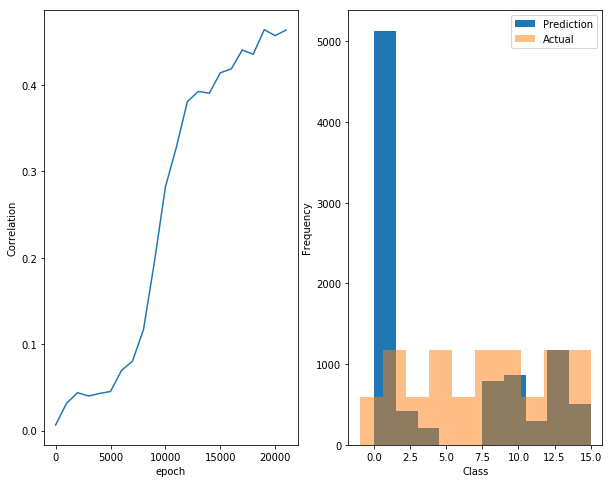

Step:  22000  Train Acc:  0.494619309615  Val Acc:  0.075 loss 1.56407565313 LR:  0.00017939882252


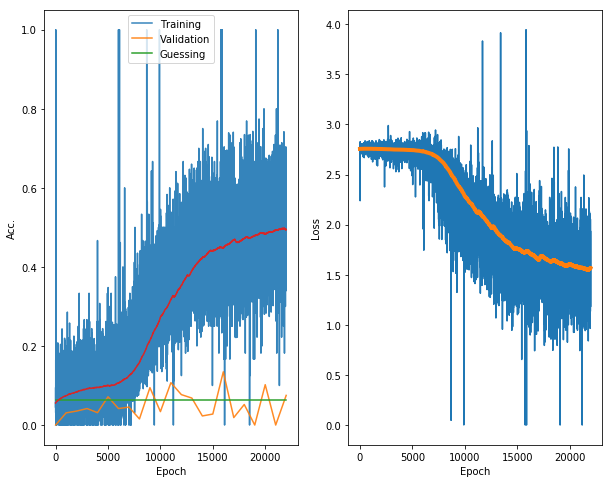

RMSE:  0.00905330056573
Ratio to zero-prediction:  1.08485714637
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.45042686057640696)


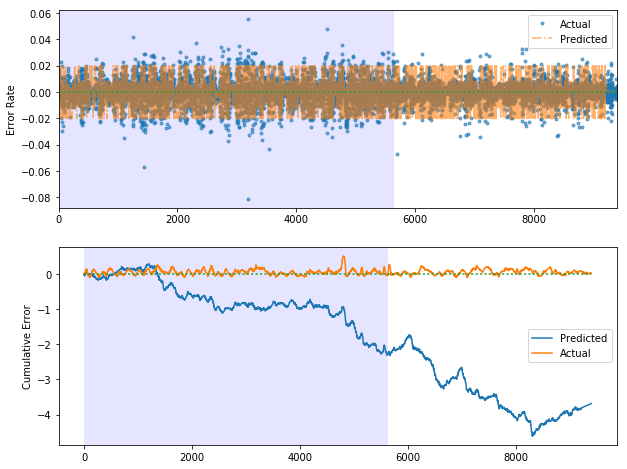

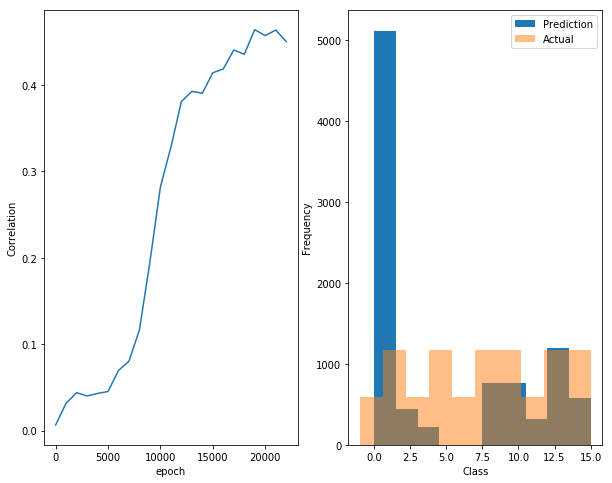

Step:  23000  Train Acc:  0.497932543954  Val Acc:  0.0985916 loss 1.54801052072 LR:  0.000168848736566


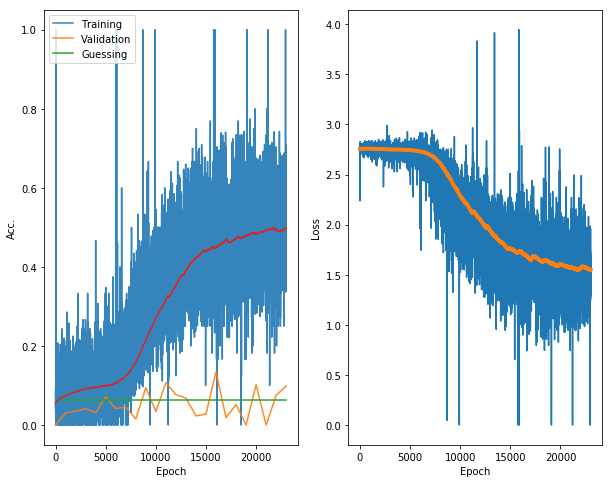

RMSE:  0.0086322683015
Ratio to zero-prediction:  1.03440484366
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.49071689991542117)


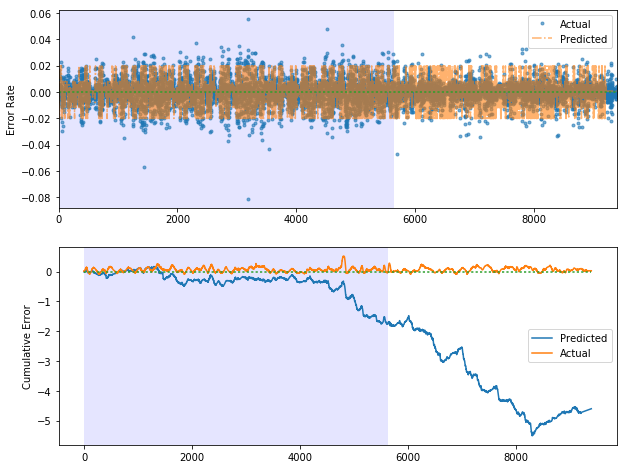

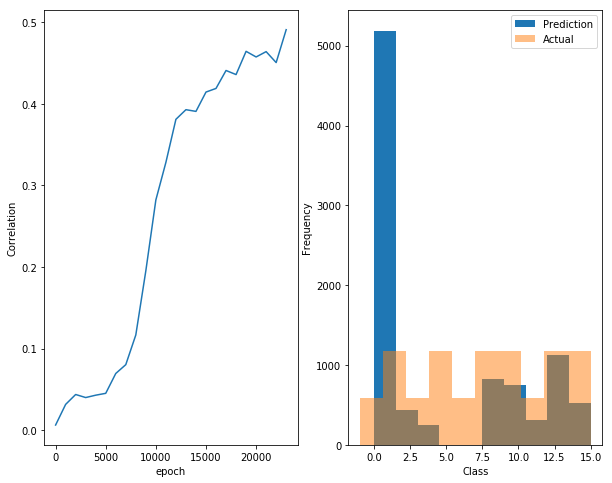

Step:  24000  Train Acc:  0.500103117853  Val Acc:  0.04 loss 1.53975455657 LR:  0.000155740698464


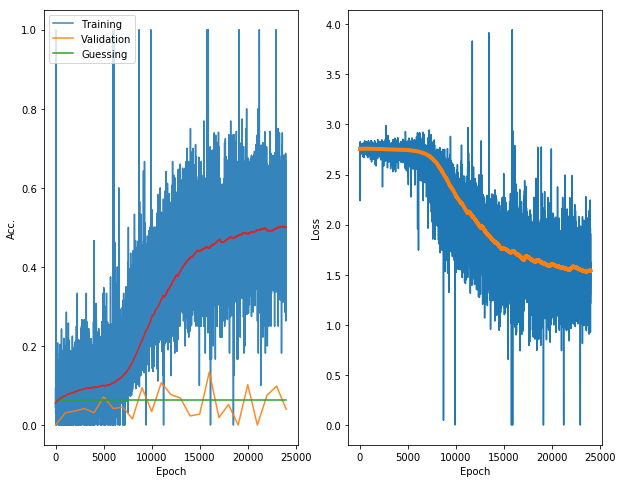

RMSE:  0.00866476030091
Ratio to zero-prediction:  1.03829836045
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.485967816908149)


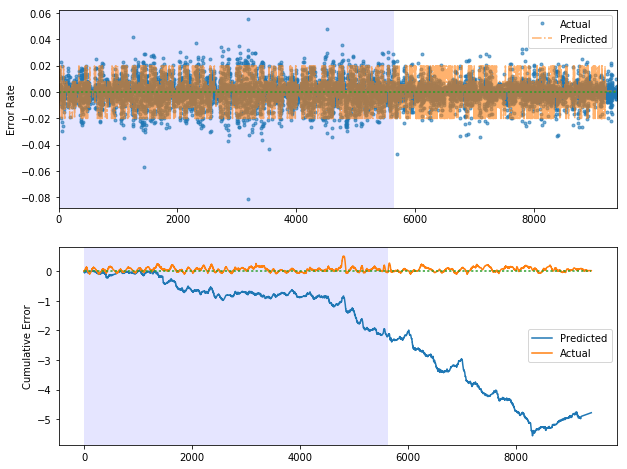

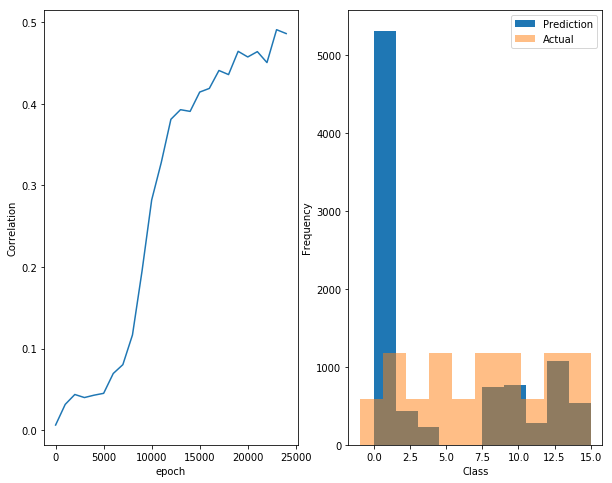

Step:  25000  Train Acc:  0.504404789485  Val Acc:  0.0714286 loss 1.51830734384 LR:  0.000146581899469


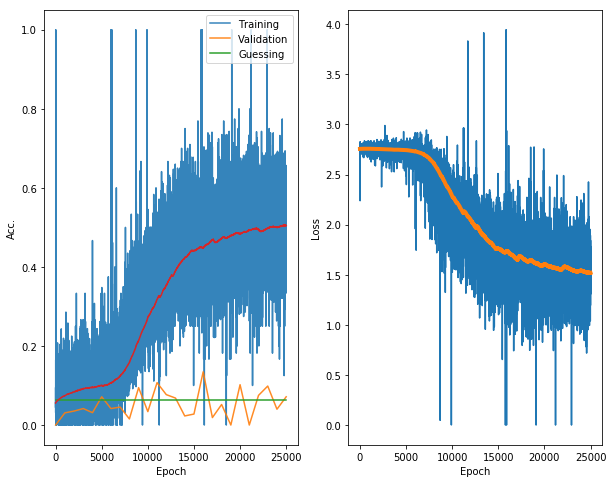

RMSE:  0.00823717001811
Ratio to zero-prediction:  0.987060210267
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.50691630180909841)


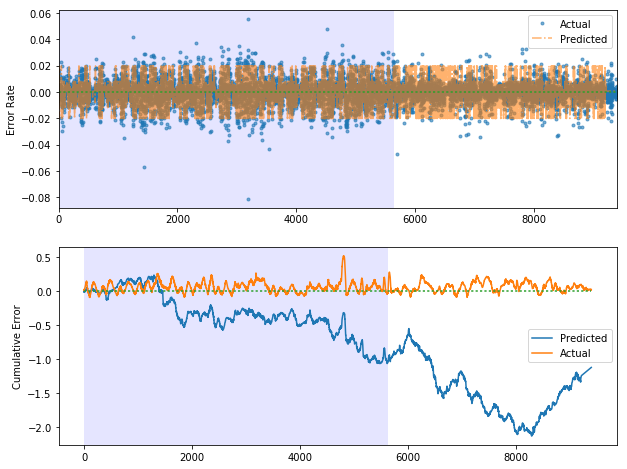

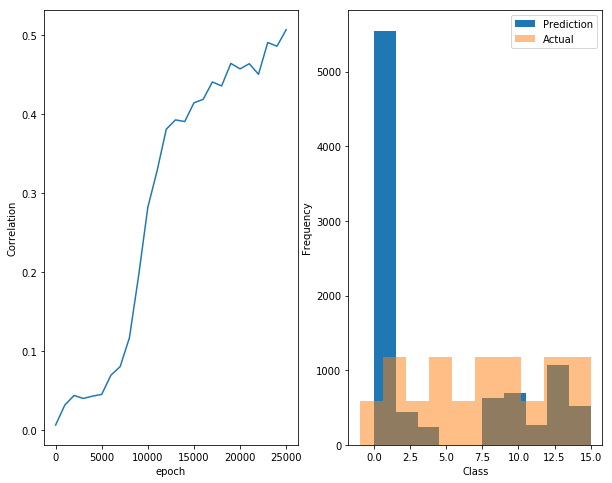

Step:  26000  Train Acc:  0.502765656785  Val Acc:  0.0972222 loss 1.5262676155 LR:  0.000137961711125


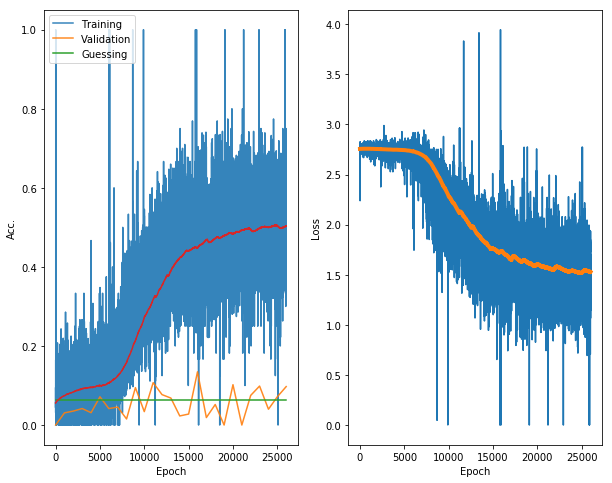

RMSE:  0.008516204075
Ratio to zero-prediction:  1.02049686561
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.49516724124744704)


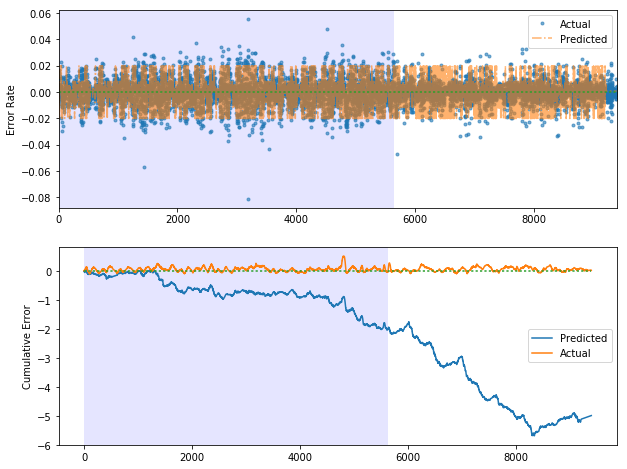

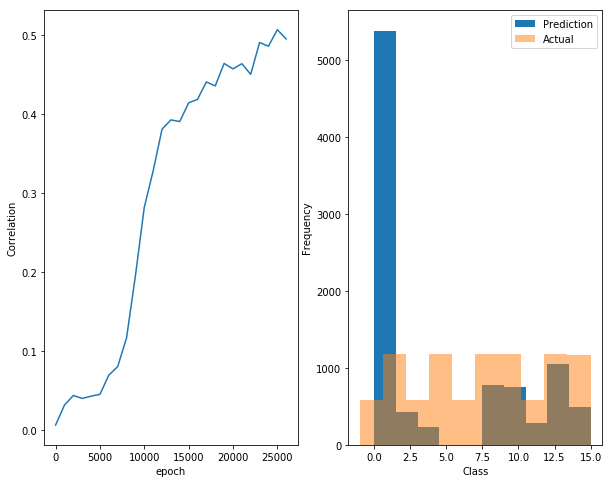

Step:  27000  Train Acc:  0.508730843516  Val Acc:  0.047619 loss 1.50420097137 LR:  0.000127251489641


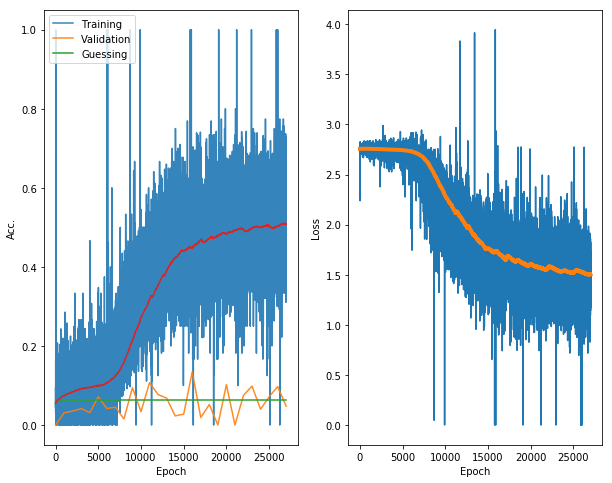

RMSE:  0.00824982562267
Ratio to zero-prediction:  0.988576731556
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.51096867550586211)


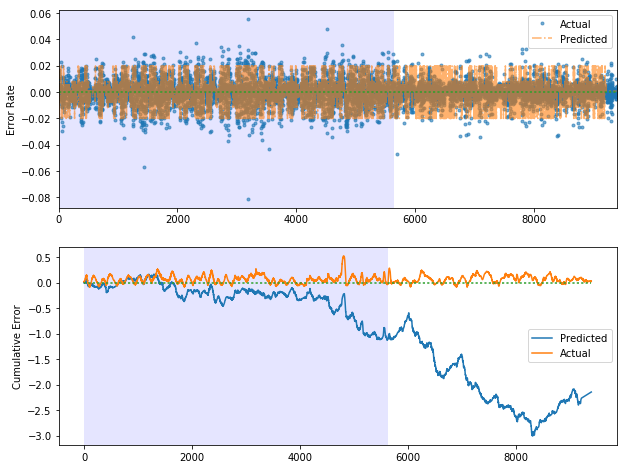

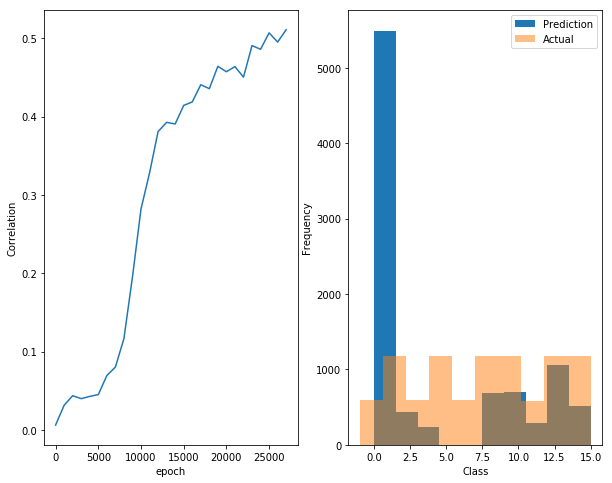

Step:  28000  Train Acc:  0.505197834099  Val Acc:  0.0379747 loss 1.52066961323 LR:  0.000119768084038


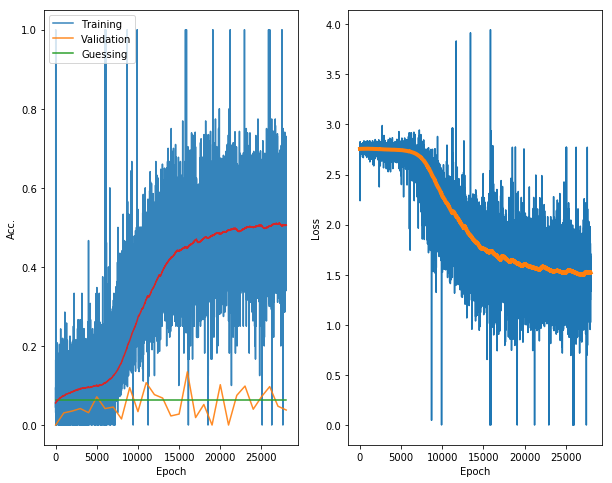

RMSE:  0.00845416877515
Ratio to zero-prediction:  1.01306317467
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.49843504207277844)


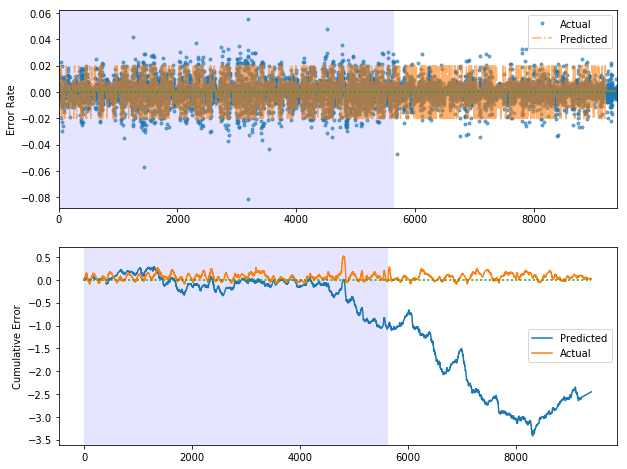

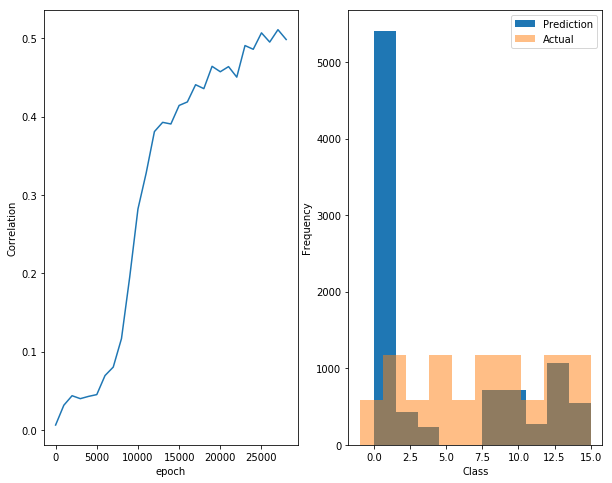

Step:  29000  Train Acc:  0.508476072386  Val Acc:  0.0212766 loss 1.50361208409 LR:  0.000112724762552


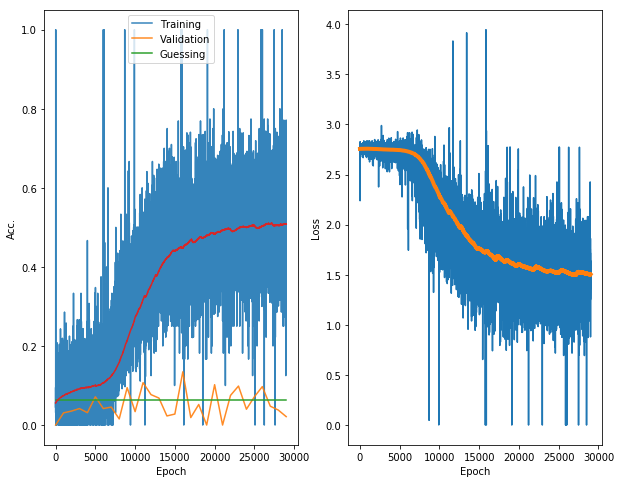

RMSE:  0.00822793839885
Ratio to zero-prediction:  0.985953985188
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.51081497599668046)


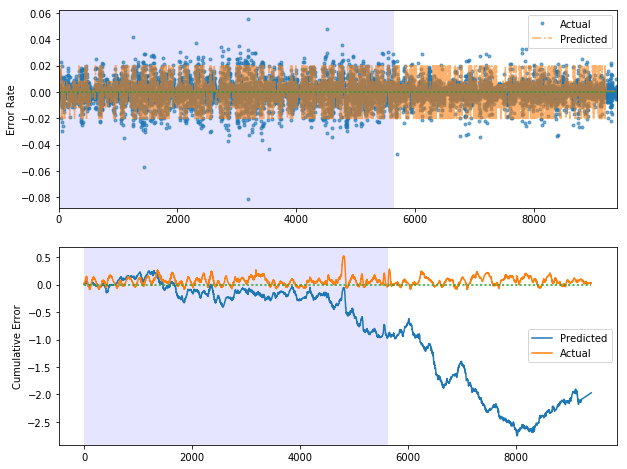

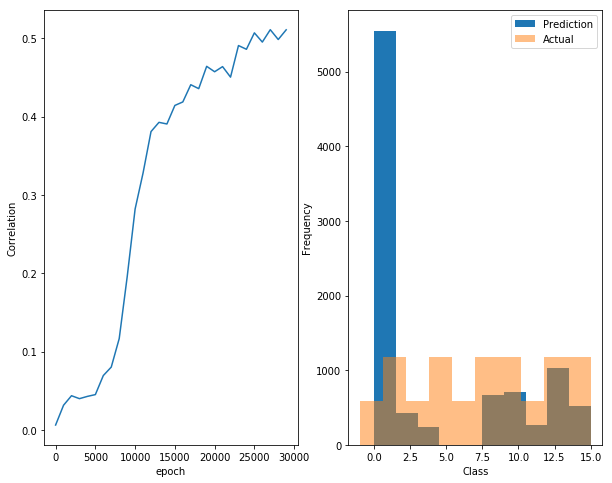

Step:  30000  Train Acc:  0.505625704766  Val Acc:  0.101266 loss 1.51536804953 LR:  0.000103973731821


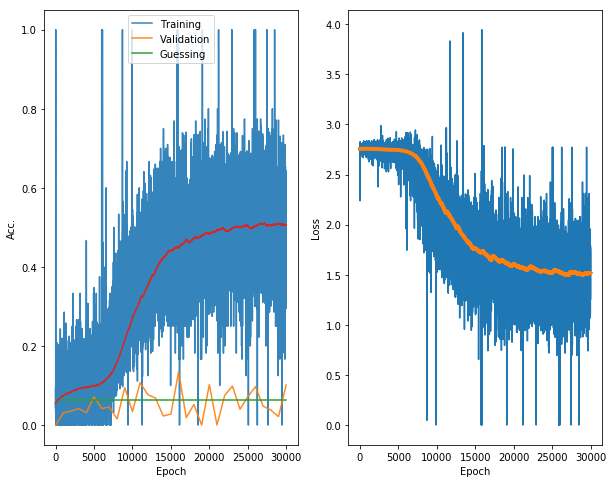

RMSE:  0.00854876236339
Ratio to zero-prediction:  1.02439832581
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.49484718316829701)


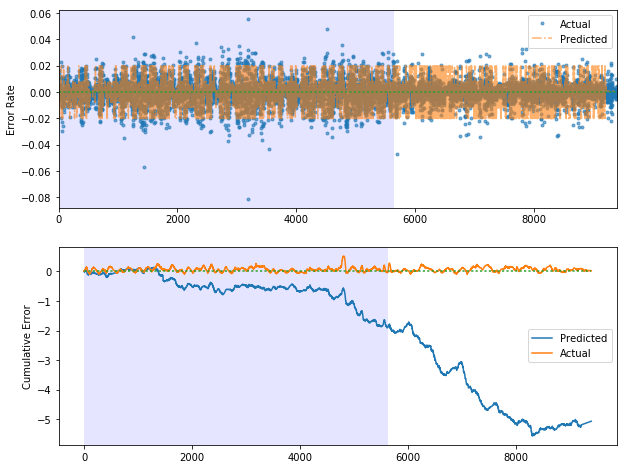

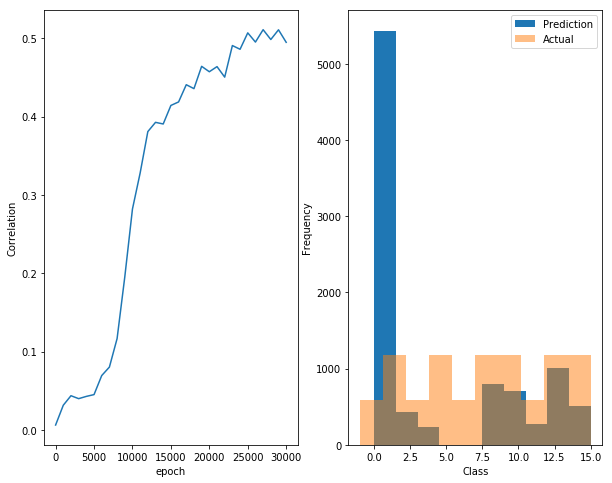

Step:  31000  Train Acc:  0.511036097616  Val Acc:  0.0 loss 1.49378875448 LR:  9.78592446005e-05


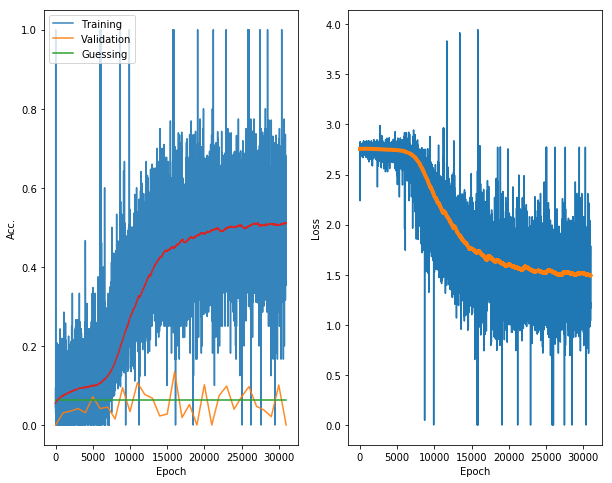

RMSE:  0.00835534934122
Ratio to zero-prediction:  1.00122164038
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.50418137196844104)


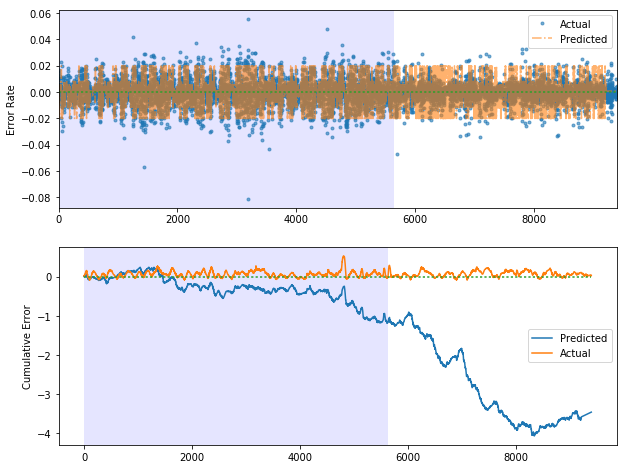

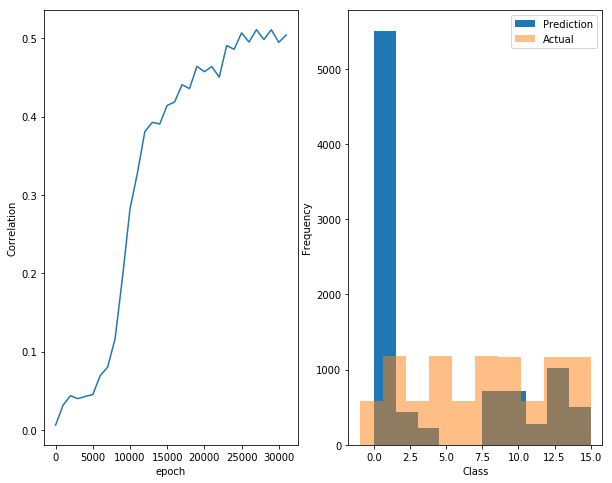

In [ ]:
print(x_data.shape)
# simple parameters:
disp_period = 1000
training_iters = 40000
lr = 0.0008 # 0.0002 is a good value for 20 bins
lr_decay = 0.98

# Launch the graph
step = 1 
history = {'train_acc': [], 'train_loss': [], 's_tacc': [], 's_tloss': [], 'val_inds': [], 'val_acc':[], 'corr':[]}
smooth_val = 0.999

for step in range(training_iters):
    if step % 300 is 0:
        lr *= lr_decay
        saver.save(sess, 'classification_model', global_step = step)
    batch_x, batch_y = utilities.sample_seqbatch(BATCH_SIZE,1, x_train, y_train)
    o,loss,acc = sess.run([model.optimizer,model.loss, model.acc], feed_dict={model.image: batch_x, model.labels: batch_y, model.lr:[lr]})

    history["train_acc"].append(acc)
    history["train_loss"].append(loss)
    if(step is 0):
        history["s_tloss"].append(loss)
        history["s_tacc"].append(acc)
    else:
        history["s_tloss"].append(smooth_val*history["s_tloss"][-1] + (1-smooth_val)*loss)
        history["s_tacc"].append(smooth_val*history["s_tacc"][-1] + (1-smooth_val)*acc)

    if step % disp_period is 0:
        # Calculate val accuracy:
        batch_x, batch_y = utilities.sample_seqbatch(BATCH_SIZE,1, x_val, y_val)
        acc_v = sess.run(model.acc, feed_dict={model.image: batch_x, model.labels: batch_y})
        history["val_acc"].append(acc_v)
        history["val_inds"].append(step)

        print('Step: ', step, ' Train Acc: ', history["s_tacc"][-1], ' Val Acc: ', history["val_acc"][-1], 'loss', history["s_tloss"][-1], 'LR: ', lr)
        plt.subplot(1,2,1)
        plt.plot(history["train_acc"],alpha=0.9)
        plt.plot(history["val_inds"], history["val_acc"],alpha=0.9)
        plt.plot([0,step], [1/float(NUM_CLASSES),1/float(NUM_CLASSES)])
        plt.legend(['Training','Validation','Guessing'])
        plt.plot(history["s_tacc"])
        plt.xlabel('Epoch')
        plt.ylabel('Acc.')
        plt.subplot(1,2,2)
        plt.plot(history["train_loss"])
        plt.plot(history["s_tloss"], linewidth=4)
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.show()

        # Prediction is cheap for this:
        y_pred = np.zeros_like(y_data)
        for k in range(0,x_data.shape[0]-(x_data.shape[0]%BATCH_SIZE),BATCH_SIZE):
            imgs = x_data[k:k+BATCH_SIZE,:,:]
            pred = sess.run(model.prediction, feed_dict={model.image: imgs, model.labels: y_norm[k:k+BATCH_SIZE]})
            y_pred[k:k+BATCH_SIZE] = pred
        prediction = mean_vals[(y_pred).astype(np.int32)];
        # hack:
        i_zero = np.where(prediction==0)
        prediction[i_zero] = 0
        # end hack
        print('RMSE: ', utilities.calc_rmse(prediction, y_norm))
        print('Ratio to zero-prediction: ', utilities.calc_rmse(prediction, y_norm)/utilities.calc_rmse(y_norm, np.zeros_like(y_norm)))
        c = utilities.plot_data(0,y_data.shape[0], prediction, y_norm, x_train.shape[0])
        history["corr"].append(c)
        
        plt.subplot(1,2,1)
        plt.plot(history["val_inds"], history["corr"])
        plt.ylabel('Correlation')
        plt.xlabel('epoch')
        
        plt.subplot(1,2,2)
        plt.hist(y_pred)
        plt.hist(y_data,alpha=0.5)
        plt.xlabel('Class')
        plt.ylabel('Frequency')
        plt.legend(['Prediction', 'Actual'])
        plt.show()

    # Compute sequence prediction:
print('Done.')


In [ ]:
# Reconstruct signal using a randomwalk model:
print('Computing sequence prediction - this may take a while. ')
y_pred = np.zeros_like(y_data)

for k in range(0,flows_data.shape[0]-(flows_data.shape[0]%BATCH_SIZE),BATCH_SIZE):
    if k % 1000 is 0:
        print('k = ', k)
    pred = sess.run(model.prediction, feed_dict={model.image: flows_data[k:k+BATCH_SIZE,:,:,:], model.labels: y_data[k:k+BATCH_SIZE]})
    y_pred[k:k+BATCH_SIZE] = pred
    


In [ ]:
# Can load a previously computed prediction - useful if cold starting a notebook.
r = mean_vals[(y_pred[:]).astype(np.int32)];
np.save('cnn_predictions',r)

y_norm = pos_err_rate

print('RMSE: ',utilities.calc_rmse(r, y_norm))

# smooth the reconstructed signal:
#r = np.zeros_like(reconstructed_signal)
#alpha = 1.0
#for k in range(reconstructed_signal.shape[0]):
#    if(k==0):
#        r[k] = reconstructed_signal[0]
#    else:
#        r[k] = alpha*reconstructed_signal[k] + (1-alpha)*r[k-1]
        
plt.plot(y_norm)
plt.plot(training_data_indices, r[training_data_indices],'.')
plt.plot(validation_data_indices, r[validation_data_indices],'.')
plt.legend(['Actual','Train','Val'])
plt.show()

#plt.title('Learning Curve')
#naive_val = 0
#for k in range(y_data.shape[0]):
#    naive_val += calc_rmse(y_data[k,:],np.zeros(OUTPUT_DIM))
#naive_val /= y_data.shape[0]

#plt.plot(train_history,'.',alpha=0.3)
#plt.plot(val_history,'.',alpha=0.3)
#plt.plot(naive_val*np.ones_like(train_history),':')
#plt.legend(['Training','Validation','Naive'])
#plt.xlabel('Epoch')
#plt.ylabel('RMSE')
#plt.show()


plot_data(0,y_data.shape[0])
plot_error(300,500)


In [ ]:
plt.plot(mean_vals[(y_pred[:]).astype(np.int32)])
print(y_pred.shape)

In [ ]:
    
    n_disc
    true_disc, mv = utilities.discretize_outputs(y_data, n_disc)
    
    
    plt.subplot(2,1,1);
    plt.plot(pos_err)
    plt.plot()
    plt.subplot(2,1,2)
#    plt.plot(y_data)
#    plt.plot(mean_vals[true_disc.astype(np.int32)],'o',alpha=0.3)
    plt.plot(mean_vals[y_pred.astype(np.int32)],'x',alpha=0.9)
#    plt.ylim([-0.02,0.02])
    plt.xlim([60000,70000])
    plt.show()
    plt.plot(d_raw[:,4],'.')
    plt.xlim([60000,70000])
    plt.show()
    
        
    plt.plot(mean_vals)
    plt.show()
